<a href="https://colab.research.google.com/github/JuanjoRestrepo/Formula-1-Predictor/blob/main/F1_Prediction_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Project Overview**


## **Objective**:
• Analyze 2024 F1 race data to understand performance trends (driver and constructor statistics).
• Build predictive models to forecast the 2025 Driver and Constructors Champions.

## **Process Outline:**

1. Environment Setup & Library Imports
2. Data Collection & Loading
3. Exploratory Data Analysis (EDA)
4. Data Preprocessing & Feature Engineering
5. Modelling (Driver and Constructor predictions)
6. Model Evaluation & Hyperparameter Tuning
7. 2025 Season Prediction
8. Conclusions & Next Steps

# **2. Environment Setup**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


import os
import requests
from bs4 import BeautifulSoup
from io import StringIO
from google.colab import drive


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# **3. Data Collection & Loading**

Downloaded from:
https://ergast.com/mrd/db/#csv

CSV Database Tables
The database can also be downloaded as a set of CSV files which can be imported into spreadsheets and other types of software:

f1db_csv.zip

In [3]:
drive.mount('/content/drive')
base_path = "/content/drive/MyDrive/Master Data Science 2024/F1_Prediction_2025/f1db_csv/"
file_name = "F1 Weather(2023-2018).csv"
file_path = os.path.join(base_path, file_name)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Carga de datasets desde Google Drive
df_circuits = pd.read_csv(f"/content/drive/MyDrive/Master Data Science 2024/F1_Prediction_2025/f1db_csv/circuits.csv")
df_constructors = pd.read_csv(f"{base_path}constructors.csv")
df_constructor_results = pd.read_csv(f"{base_path}constructor_results.csv")
df_constructor_standings = pd.read_csv(f"{base_path}constructor_standings.csv")
df_driver_standings = pd.read_csv(f"{base_path}driver_standings.csv")
df_drivers = pd.read_csv(f"{base_path}drivers.csv")
df_lap_times = pd.read_csv(f"{base_path}lap_times.csv")
df_pit_stops = pd.read_csv(f"{base_path}pit_stops.csv")
df_qualifying = pd.read_csv(f"{base_path}qualifying.csv")
df_results = pd.read_csv(f"{base_path}results.csv")
df_seasons = pd.read_csv(f"{base_path}seasons.csv")
df_sprint_results = pd.read_csv(f"{base_path}sprint_results.csv")
df_status = pd.read_csv(f"{base_path}status.csv")
df_races = pd.read_csv(f"{base_path}races.csv")


# **4. Exploratory Data Analysis (EDA)**
The goal of this phase is to gain a deep understanding of your 2024 F1 race data by inspecting the structure and contents of your key datasets. In this project, we primarily focus on the following CSV files:

1. **df_races** – Race event details (names, dates, etc.)
2. **df_results** – Race results (finishing positions, points, etc.)
3. **df_drivers** – Driver information
4. **df_constructors** – Constructor (team) information
5. **df_lap_times** – Lap time data for deeper performance analysis
6. **df_circuits:** -  Circuit information (location, country, track details)

## **4.1 Overview of the Dataset**
Before diving into any advanced visualizations, it’s important to inspect the structure and contents of these key datasets. Run the following code to print the shapes, columns, and check for missing values:

In [5]:
print("Races dataset shape:", df_races.shape)
print("Races dataset columns:", df_races.columns.tolist())
print("\nFirst 5 rows of df_races:")
print(df_races.head())

Races dataset shape: (1125, 18)
Races dataset columns: ['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time']

First 5 rows of df_races:
   raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   

       time                                                url fp1_date  \
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...       \N   
2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gra

In [6]:
# Results dataset
print("\nResults dataset shape:", df_results.shape)
print("Results dataset columns:", df_results.columns.tolist())
print("\nFirst 5 rows of df_results:")
print(df_results.head())



Results dataset shape: (26759, 18)
Results dataset columns: ['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid', 'position', 'positionText', 'positionOrder', 'points', 'laps', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId']

First 5 rows of df_results:
   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    5

In [7]:
# Drivers dataset
print("\nDrivers dataset shape:", df_drivers.shape)
print("Drivers dataset columns:", df_drivers.columns.tolist())
print("\nFirst 5 rows of df_drivers:")
print(df_drivers.head())



Drivers dataset shape: (861, 9)
Drivers dataset columns: ['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob', 'nationality', 'url']

First 5 rows of df_drivers:
   driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalai

In [8]:
# Constructors dataset
print("\nConstructors dataset shape:", df_constructors.shape)
print("Constructors dataset columns:", df_constructors.columns.tolist())
print("\nFirst 5 rows of df_constructors:")
print(df_constructors.head())



Constructors dataset shape: (212, 5)
Constructors dataset columns: ['constructorId', 'constructorRef', 'name', 'nationality', 'url']

First 5 rows of df_constructors:
   constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso  


In [9]:
# Lap Times dataset
print("\nLap Times dataset shape:", df_lap_times.shape)
print("Lap Times dataset columns:", df_lap_times.columns.tolist())
print("\nFirst 5 rows of df_lap_times:")
print(df_lap_times.head())



Lap Times dataset shape: (589081, 6)
Lap Times dataset columns: ['raceId', 'driverId', 'lap', 'position', 'time', 'milliseconds']

First 5 rows of df_lap_times:
   raceId  driverId  lap  position      time  milliseconds
0     841        20    1         1  1:38.109         98109
1     841        20    2         1  1:33.006         93006
2     841        20    3         1  1:32.713         92713
3     841        20    4         1  1:32.803         92803
4     841        20    5         1  1:32.342         92342


In [10]:
print("\nCircuits dataset shape:", df_circuits.shape)
print("Circuits dataset columns:", df_circuits.columns.tolist())
print("\nFirst 5 rows of df_circuits:")
print(df_circuits.head())


Circuits dataset shape: (77, 9)
Circuits dataset columns: ['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng', 'alt', 'url']

First 5 rows of df_circuits:
   circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://

### Missing Values

In [11]:
print("\n==== Missing Values in df_constructors ====")
print(df_constructors.isnull().sum())

print("\n==== Missing Values in df_drivers ====")
print(df_drivers.isnull().sum())

print("\n==== Missing Values in df_results ====")
print(df_results.isnull().sum())

print("\n==== Missing Values in df_races ====")
print(df_races.isnull().sum())

print("\n==== Missing Values in df_lap_times ====")
print(df_lap_times.isnull().sum())

print("\n==== Missing Values in df_circuits ====")
print(df_circuits.isnull().sum())


==== Missing Values in df_constructors ====
constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64

==== Missing Values in df_drivers ====
driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

==== Missing Values in df_results ====
resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

==== Missing Values in df_races ====
raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time           0
url            0
fp1_date       0
fp1_time      

## **4.2 Limpieza y preprocesamiento de datos** XXXXXXXX

In [12]:
# Merge relevant tables
race_results = pd.merge(df_races, df_results, on='raceId')
race_results = pd.merge(race_results, df_drivers, on='driverId')
race_results = pd.merge(race_results, df_constructors, on='constructorId')

# Show the merged dataset
print("\nMerged dataset shape:", race_results.shape)
print("\nMerged dataset columns:", race_results.columns.tolist())


Merged dataset shape: (26759, 47)

Merged dataset columns: ['raceId', 'year', 'round', 'circuitId', 'name_x', 'date', 'time_x', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'resultId', 'driverId', 'constructorId', 'number_x', 'grid', 'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_y', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'driverRef', 'number_y', 'code', 'forename', 'surname', 'dob', 'nationality_x', 'url_y', 'constructorRef', 'name_y', 'nationality_y', 'url']


In [13]:
# Create target variable using position order. This will be a binary that will say if someone is on the podium or not
race_results['podium_finish'] = (race_results['positionOrder'] <= 3).astype(int)

# Create full name for drivers
race_results['driver_name'] = race_results['forename'] + ' ' + race_results['surname']

In [14]:
# These are the only columns we need, and there's more unwanted columns so we won't drop, just update the df
relevant_columns = [
                    'raceId', 'year', 'round', 'circuitId', 'grid', 'position',
                    'points', 'laps', 'fastestLapSpeed', 'driverId', 'driver_name',
                    'constructorId', 'podium_finish'
                   ]

race_results = race_results[relevant_columns]
race_results.head()

,raceId,year,round,circuitId,grid,position,points,laps,fastestLapSpeed,driverId,driver_name,constructorId,podium_finish
0,1,2009,1,1,1,1,10.0,58,216.891,18,Jenson Button,23,1
1,1,2009,1,1,2,2,8.0,58,214.344,22,Rubens Barrichello,23,1
2,1,2009,1,1,20,3,6.0,58,214.706,15,Jarno Trulli,7,1
3,1,2009,1,1,19,4,5.0,58,215.920,10,Timo Glock,7,0
4,1,2009,1,1,10,5,4.0,58,215.199,4,Fernando Alonso,4,0


In [15]:
race_results.tail()

,raceId,year,round,circuitId,grid,position,points,laps,fastestLapSpeed,driverId,driver_name,constructorId,podium_finish
26754,1144,2024,24,24,14,16,0.0,57,222.002,825,Kevin Magnussen,210,0
26755,1144,2024,24,24,12,17,0.0,55,214.212,859,Liam Lawson,215,0
26756,1144,2024,24,24,9,\N,0.0,30,212.462,822,Valtteri Bottas,15,0
26757,1144,2024,24,24,20,\N,0.0,26,212.631,861,Franco Colapinto,3,0
26758,1144,2024,24,24,10,\N,0.0,0,\N,815,Sergio Pérez,9,0


In [16]:
# Handle missing values. The dataset originally had \N as a placeholder, so we need to keep that in mind
print(race_results.isnull().sum())

raceId             0
year               0
round              0
circuitId          0
grid               0
position           0
points             0
laps               0
fastestLapSpeed    0
driverId           0
driver_name        0
constructorId      0
podium_finish      0
dtype: int64


In [17]:
# Remove duplicates if any
duplicates_count = race_results.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates_count}")
race_results = race_results.drop_duplicates()


Number of duplicate rows: 0


In [18]:
# Display basic information about the cleaned dataset
print("\nCleaned dataset info:")
print(race_results.info())


Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   raceId           26759 non-null  int64  
 1   year             26759 non-null  int64  
 2   round            26759 non-null  int64  
 3   circuitId        26759 non-null  int64  
 4   grid             26759 non-null  int64  
 5   position         26759 non-null  object 
 6   points           26759 non-null  float64
 7   laps             26759 non-null  int64  
 8   fastestLapSpeed  26759 non-null  object 
 9   driverId         26759 non-null  int64  
 10  driver_name      26759 non-null  object 
 11  constructorId    26759 non-null  int64  
 12  podium_finish    26759 non-null  int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 2.7+ MB
None


We convert *position* and *fastestLapSpeed* to a numeric value: float64

In [19]:
race_results['position'] = pd.to_numeric(race_results['position'], errors='coerce').astype('float64')
race_results['fastestLapSpeed'] = pd.to_numeric(race_results['fastestLapSpeed'], errors='coerce').astype('float64')

In [20]:
print("\nCleaned dataset info:")
print(race_results.info())


Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   raceId           26759 non-null  int64  
 1   year             26759 non-null  int64  
 2   round            26759 non-null  int64  
 3   circuitId        26759 non-null  int64  
 4   grid             26759 non-null  int64  
 5   position         15806 non-null  float64
 6   points           26759 non-null  float64
 7   laps             26759 non-null  int64  
 8   fastestLapSpeed  8252 non-null   float64
 9   driverId         26759 non-null  int64  
 10  driver_name      26759 non-null  object 
 11  constructorId    26759 non-null  int64  
 12  podium_finish    26759 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 2.7+ MB
None


In [21]:
race_results.head(10)

,raceId,year,round,circuitId,grid,position,points,laps,fastestLapSpeed,driverId,driver_name,constructorId,podium_finish
0,1,2009,1,1,1,1.0,10.0,58,216.891,18,Jenson Button,23,1
1,1,2009,1,1,2,2.0,8.0,58,214.344,22,Rubens Barrichello,23,1
2,1,2009,1,1,20,3.0,6.0,58,214.706,15,Jarno Trulli,7,1
3,1,2009,1,1,19,4.0,5.0,58,215.920,10,Timo Glock,7,0
4,1,2009,1,1,10,5.0,4.0,58,215.199,4,Fernando Alonso,4,0
5,1,2009,1,1,5,6.0,3.0,58,217.668,3,Nico Rosberg,3,0
6,1,2009,1,1,13,7.0,2.0,58,213.950,67,Sébastien Buemi,5,0
7,1,2009,1,1,17,8.0,1.0,58,212.537,7,Sébastien Bourdais,5,0
8,1,2009,1,1,16,9.0,0.0,58,214.640,16,Adrian Sutil,10,0
9,1,2009,1,1,9,10.0,0.0,58,216.245,2,Nick Heidfeld,2,0


In [22]:
race_results.tail(10)

,raceId,year,round,circuitId,grid,position,points,laps,fastestLapSpeed,driverId,driver_name,constructorId,podium_finish
26749,1144,2024,24,24,18,11.0,0.0,57,212.567,848,Alexander Albon,3,0
26750,1144,2024,24,24,11,12.0,0.0,57,213.134,852,Yuki Tsunoda,215,0
26751,1144,2024,24,24,15,13.0,0.0,57,216.085,855,Guanyu Zhou,15,0
26752,1144,2024,24,24,13,14.0,0.0,57,214.568,840,Lance Stroll,117,0
26753,1144,2024,24,24,17,15.0,0.0,57,213.323,862,Jack Doohan,214,0
26754,1144,2024,24,24,14,16.0,0.0,57,222.002,825,Kevin Magnussen,210,0
26755,1144,2024,24,24,12,17.0,0.0,55,214.212,859,Liam Lawson,215,0
26756,1144,2024,24,24,9,NaN,0.0,30,212.462,822,Valtteri Bottas,15,0
26757,1144,2024,24,24,20,NaN,0.0,26,212.631,861,Franco Colapinto,3,0
26758,1144,2024,24,24,10,NaN,0.0,0,NaN,815,Sergio Pérez,9,0


In [23]:
# Display final shape and columns of the cleaned df
print("\nFinal shape of the cleaned dataset:", race_results.shape)
print("\nColumns in the cleaned dataset:")
print(race_results.columns.tolist())


Final shape of the cleaned dataset: (26759, 13)

Columns in the cleaned dataset:
['raceId', 'year', 'round', 'circuitId', 'grid', 'position', 'points', 'laps', 'fastestLapSpeed', 'driverId', 'driver_name', 'constructorId', 'podium_finish']


In [24]:
# Descriptive statistics
print(race_results.describe())

             raceId          year         round     circuitId          grid  \
count  26759.000000  26759.000000  26759.000000  26759.000000  26759.000000   
mean     551.687283   1991.394372      8.511192     23.820808     11.134796   
std      313.265036     19.952885      5.070231     19.112002      7.202860   
min        1.000000   1950.000000      1.000000      1.000000      0.000000   
25%      300.000000   1977.000000      4.000000      9.000000      5.000000   
50%      531.000000   1991.000000      8.000000     18.000000     11.000000   
75%      811.000000   2009.000000     12.000000     34.000000     17.000000   
max     1144.000000   2024.000000     24.000000     80.000000     34.000000   

           position        points          laps  fastestLapSpeed  \
count  15806.000000  26759.000000  26759.000000      8252.000000   
mean       8.020499      1.987632     46.301768       204.116330   
std        4.840796      4.351209     29.496557        21.377265   
min        1.000

## **4.3 Driver Performance Analysis** XXXXXXXX
Merge the results and drivers datasets to get full driver names, then compute summary metrics such as the average finishing position and the number of wins. This helps identify which drivers are consistently performing well.

<ipython-input-25-2e9e32e9536b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='podium_finish', data=race_results,  palette=['skyblue', 'orange'])


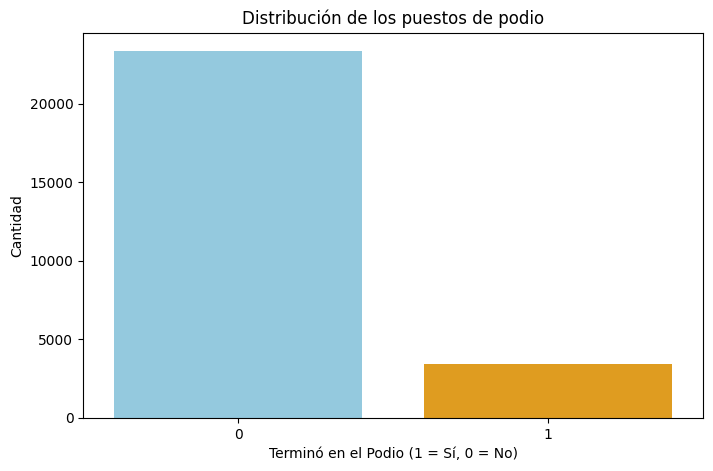

In [25]:
# Distribución de los puestos de podio
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='podium_finish', data=race_results,  palette=['skyblue', 'orange'])
plt.title('Distribución de los puestos de podio')
plt.xlabel('Terminó en el Podio (1 = Sí, 0 = No)')
plt.ylabel('Cantidad')
plt.show()

### Matriz de Correlación

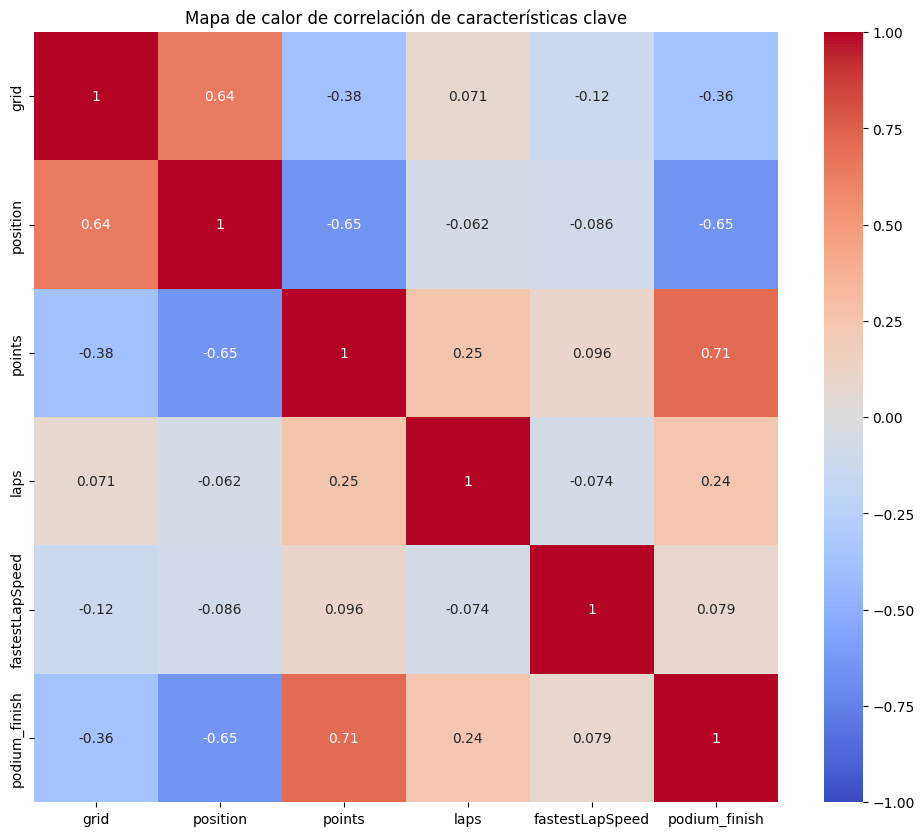

In [26]:
race_results_cleaned = race_results.copy()

heatmap_columns = ['grid', 'position', 'points',
                   'laps', 'fastestLapSpeed', 'podium_finish']
# Replace '\\N' with NaN and convert columns to numeric
for column in heatmap_columns:
    # Replace '\\N' with NaN
    race_results_cleaned[column] = race_results_cleaned[column].replace('\\N', np.nan)
    # Convert the column to numeric, errors='coerce' will handle any remaining non-numeric values
    race_results_cleaned[column] = pd.to_numeric(race_results_cleaned[column], errors='coerce')


# Create correlation matrix
corr = race_results_cleaned[heatmap_columns].corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Mapa de calor de correlación de características clave')
plt.show()

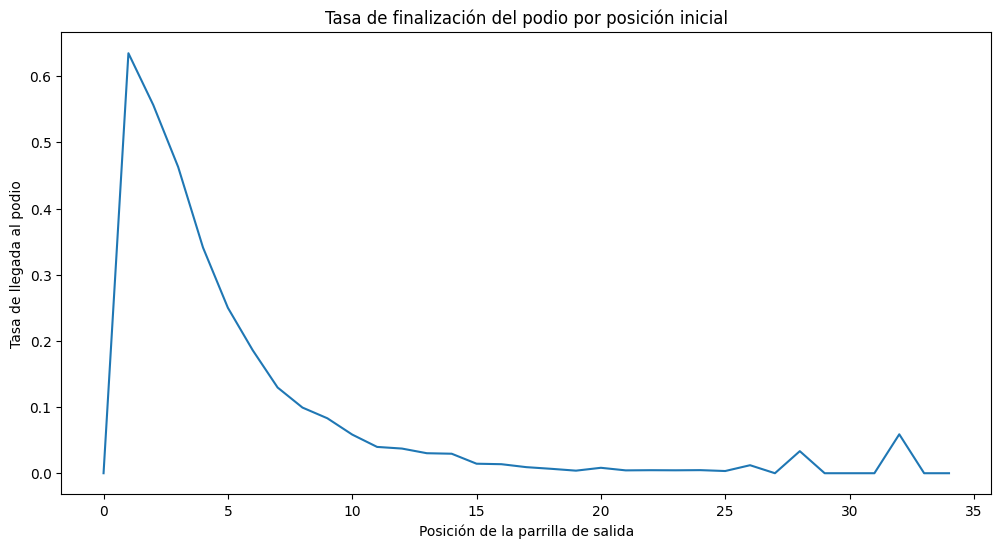

In [27]:
# Tasa de finalización del podio por posición inicial
podium_rate = race_results.groupby('grid')['podium_finish'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=podium_rate.index, y=podium_rate.values)
plt.title('Tasa de finalización del podio por posición inicial')
plt.xlabel('Posición de la parrilla de salida')
plt.ylabel('Tasa de llegada al podio')
plt.show()

   constructorId  podium_finish        name
0              6            841     Ferrari
1              1            508     McLaren
2              3            314    Williams
3            131            298    Mercedes
4              9            282    Red Bull
5             32            114  Team Lotus
6              4            103     Renault
7             22            102    Benetton
8             34             78     Brabham
9             25             77     Tyrrell


<ipython-input-28-bd995eeab695>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='name', y='podium_finish', data=top_constructors, palette=plot_colors)


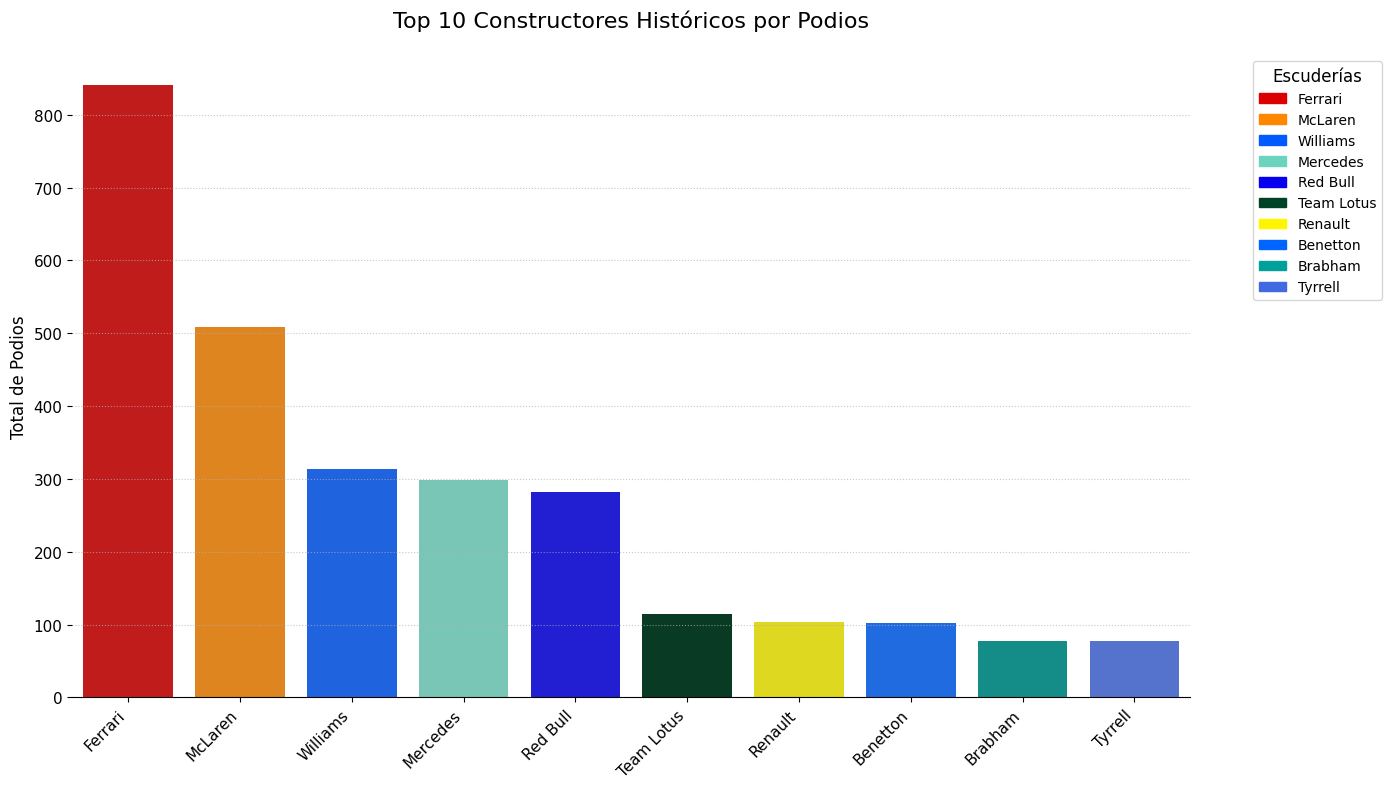

In [28]:
# top constructors
top_constructors = race_results.groupby('constructorId')['podium_finish'].sum().sort_values(ascending=False).head(10)
top_constructors = top_constructors.reset_index()
top_constructors = pd.merge(top_constructors, df_constructors[['constructorId', 'name']], on='constructorId')

print(top_constructors)

team_colors = {
    'Ferrari': '#DC0000',          # Rojo Ferrari clásico
    'McLaren': '#FF8700',          # Naranja McLaren histórico
    'Williams': '#005AFF',         # Azul Williams moderno
    'Mercedes': '#6CD3BF',         # Verde-azulado Mercedes
    'Red Bull': '#0600EF',         # Azul Red Bull
    'Team Lotus': '#004225',       # Verde British Racing (Lotus histórico)
    'Renault': '#FFF500',          # Amarillo Renault
    'Benetton': '#0064FF',         # Azul Benetton (era Schumacher)
    'Brabham': '#00A19B',          # Verde-azulado Brabham (era Gordon Murray)
    'Tyrrell': '#4169E1'           # Azul Tyrrell (clásico)
}

# Mapear colores según el orden actual de los equipos
plot_colors = [team_colors[team] for team in top_constructors['name']]

# Configurar el gráfico
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='name', y='podium_finish', data=top_constructors, palette=plot_colors)

# Personalización avanzada
plt.title('Top 10 Constructores Históricos por Podios', fontsize=16, pad=20)
plt.xlabel('', fontsize=12)
plt.ylabel('Total de Podios', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Leyenda mejorada
legend_labels = [f"{team}" for team, color in team_colors.items()]
handles = [plt.Rectangle((0,0),1,1, color=color) for color in team_colors.values()]
plt.legend(handles, legend_labels,
           title='Escuderías',
           bbox_to_anchor=(1.05, 1),
           loc='upper left',
           title_fontsize=12,
           fontsize=10)

# Añadir grid y bordes
plt.grid(axis='y', linestyle=':', linewidth=0.8, alpha=0.7)
sns.despine(left=True)

plt.tight_layout()
plt.show()

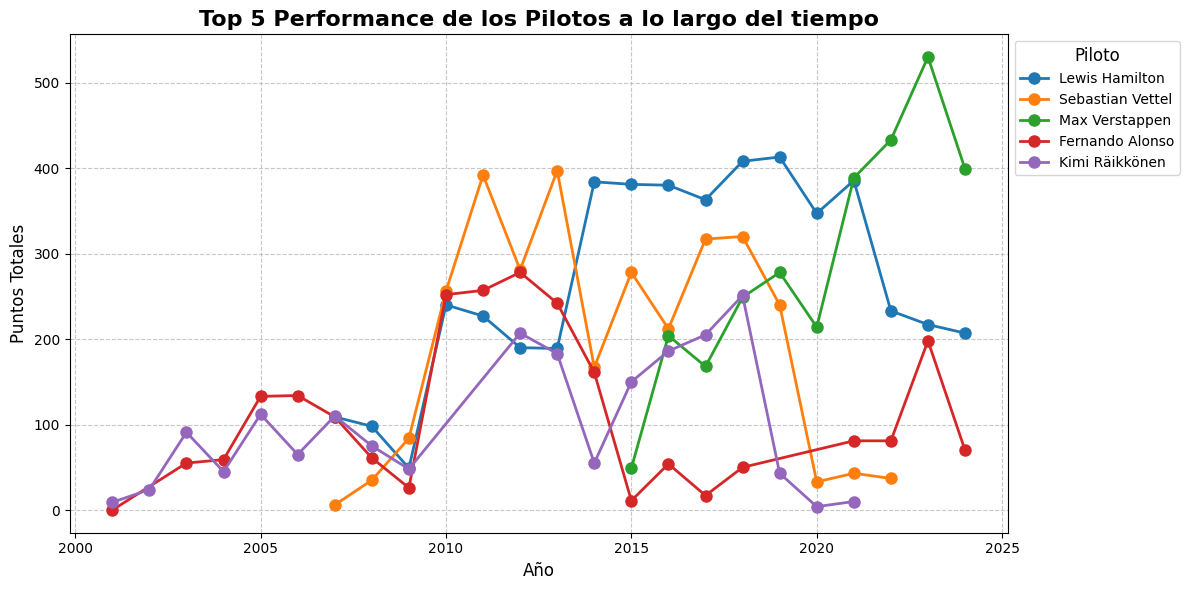

In [29]:
# Get top 5 drivers by total points
top_drivers = race_results.groupby('driver_name')['points'].sum().nlargest(5).index

# Filter data for top drivers
top_drivers_data = race_results[race_results['driver_name'].isin(top_drivers)]

# Create line plot
plt.figure(figsize=(12, 6))
for driver in top_drivers:
    driver_data = top_drivers_data[top_drivers_data['driver_name'] == driver]
    yearly_points = driver_data.groupby('year')['points'].sum()
    plt.plot(yearly_points.index, yearly_points.values, marker='o', linewidth=2, markersize=8, label=driver)

plt.title('Top 5 Performance de los Pilotos a lo largo del tiempo', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Puntos Totales', fontsize=12)
plt.legend(title='Piloto', title_fontsize='12', fontsize='10', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-30-3f3cc527a387>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_drivers.index, y=top_drivers.values, palette=palette)


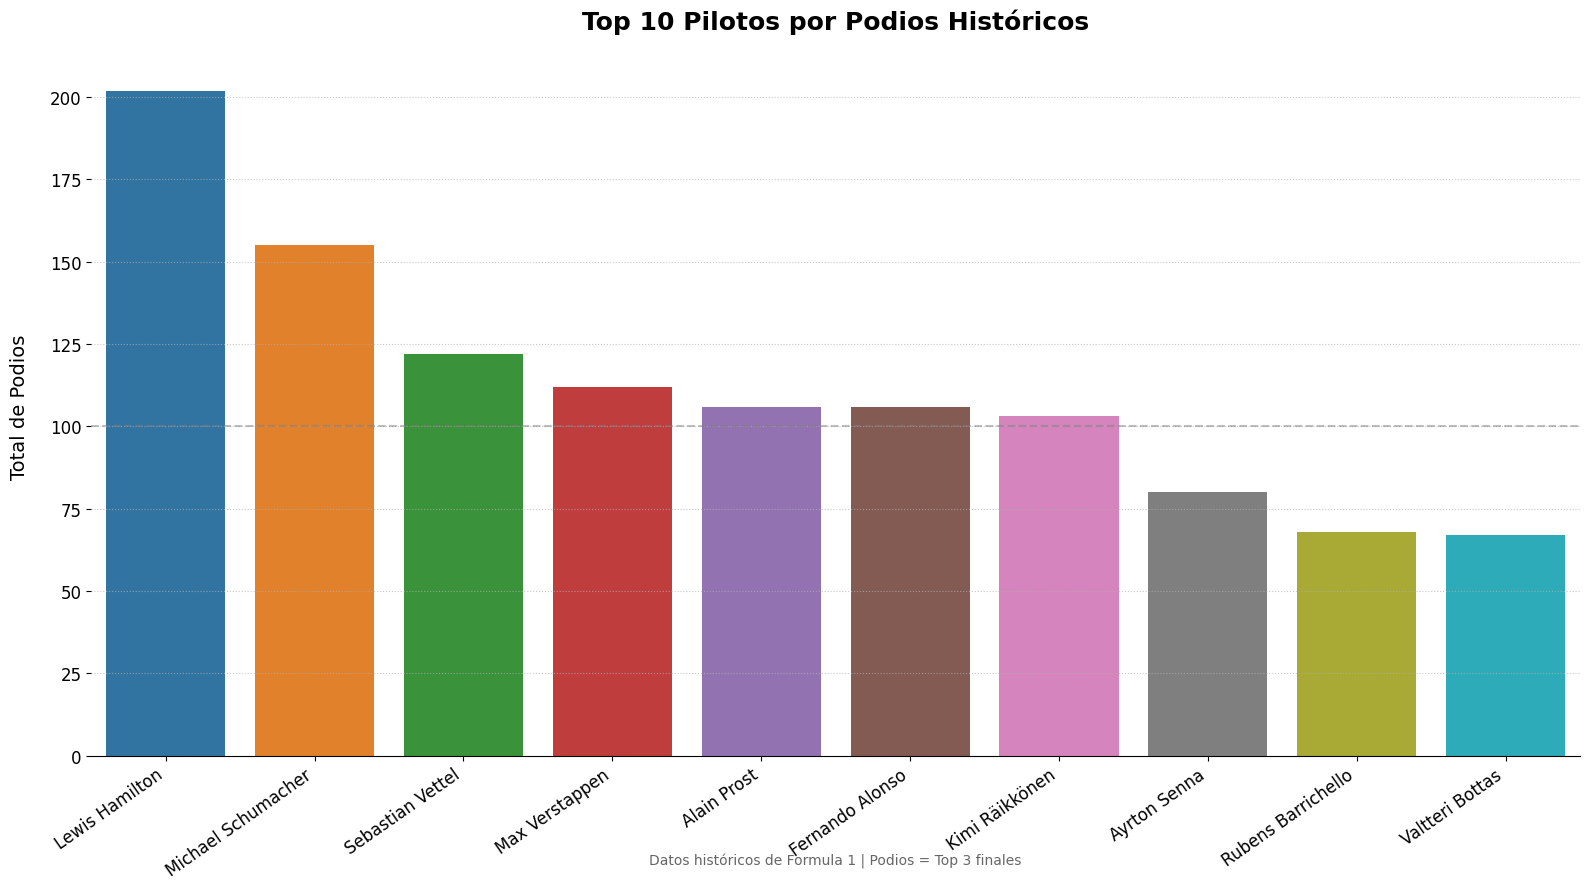

In [30]:
# Top 10 drivers by podium finishes con estilo mejorado
plt.figure(figsize=(16, 9))

top_drivers = race_results.groupby('driver_name')['podium_finish'].sum().nlargest(10)


palette = sns.color_palette(n_colors=10)  # Paleta de colores vibrantes
ax = sns.barplot(x=top_drivers.index, y=top_drivers.values, palette=palette)


plt.title('Top 10 Pilotos por Podios Históricos',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('', fontsize=14)
plt.ylabel('Total de Podios', fontsize=14, labelpad=15)
plt.xticks(rotation=35, ha='right', fontsize=12)
plt.yticks(fontsize=12)




# Añadir línea de referencia y grid
plt.axhline(y=100, color='gray', linestyle='--', alpha=0.5)
plt.grid(axis='y', linestyle=':', alpha=0.7)

# Añadir nota al pie
plt.annotate('Datos históricos de Formula 1 | Podios = Top 3 finales',
            xy=(0.5, -0.15), xycoords='axes fraction',
            ha='center', va='center', fontsize=10, color='#666666')

# Mejorar el layout
sns.despine(left=True)
plt.tight_layout()
plt.show()

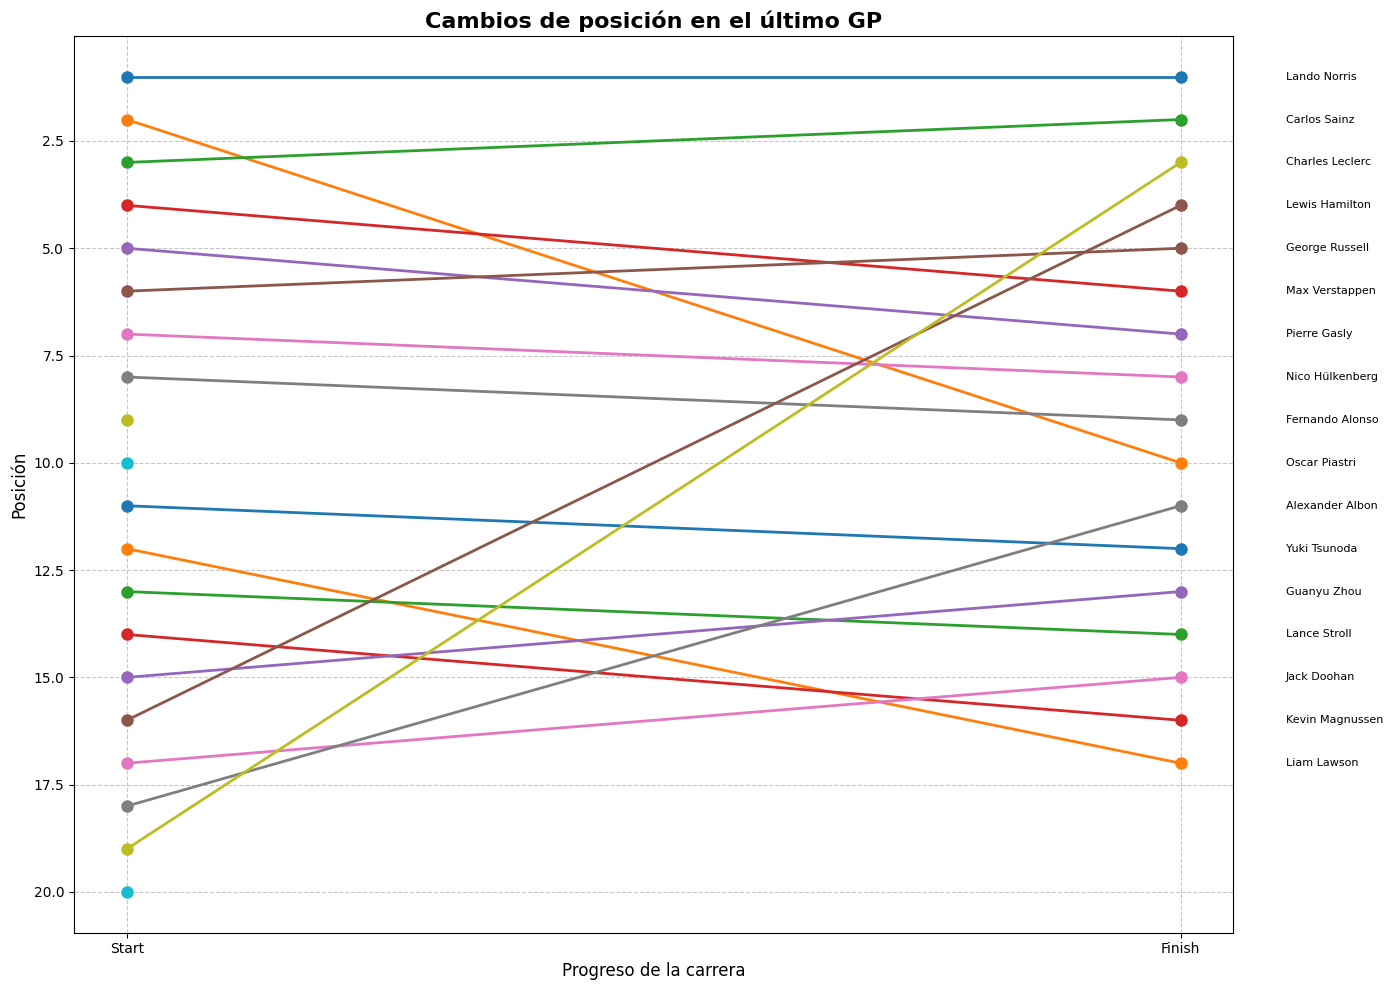

In [31]:
# Sample race grid position and ending position
latest_race = race_results['raceId'].max()
race_data = race_results[race_results['raceId'] == latest_race].sort_values('grid')

plt.figure(figsize=(14, 10))
for _, driver in race_data.iterrows():
    plt.plot([1, 2], [driver['grid'], driver['position']], '-o', linewidth=2, markersize=8)
    plt.text(2.1, driver['position'], driver['driver_name'], fontsize=8, verticalalignment='center')

plt.title(f'Cambios de posición en el último GP', fontsize=16, fontweight='bold')
plt.xlabel('Progreso de la carrera', fontsize=12)
plt.ylabel('Posición', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis so that 1st position is at the top
plt.xticks([1, 2], ['Start', 'Finish'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing & Feature Engineering**

## **5.1 Data Cleaning and Encoding**

### Circuits

In [32]:
# Circuits
import folium

# Create a Map instance
m = folium.Map(location=[20, 0], zoom_start=2)

for idx, row in df_circuits.iterrows():
    # Place marker for each circuit
    folium.Marker([row['lat'], row['lng']], popup=f"{row['location']}, {row['country']}").add_to(m)

# Show the map
m

In [33]:
# Extract the length of track and no. turns from the wikipedia url given in df_circuits.
# And merge Length and Turns into the dataframe df_circuits
from lxml import etree
len_turn_data = []

def length_turn(url, cId):
    response = requests.get(url)

    # Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the table element
    table = soup.find("table", class_="infobox")
    df = pd.read_html(StringIO(str(table)))[0]

    # If Length/Turns is not available set them to 0.
    try:
        length = df.loc[np.where(df == 'Length')[0][0]].iloc[1]
        turns = df.loc[np.where(df == 'Turns')[0][0]].iloc[1]
    except IndexError:
        length = '0.0000'
        turns = '0'

    # Append the List: [circuitId, Length, Turns]
    len_turn_data.append([cId, length, turns])

# Function to extract Length and Turns for each circuit according to circuitId
for cId, url in zip(df_circuits.circuitId, df_circuits.url):
    length_turn(url, cId)

# Convert the Length and Turns column in float and int types
df_len_turn = pd.DataFrame(data=len_turn_data, columns=["circuitId", "Length", "Turns"])

df_len_turn['Length'] = df_len_turn['Length'].str[:5].astype(float)
df_len_turn['Turns'] = df_len_turn['Turns'].str[:2].astype(int)

# Merge the Length & Turns dataframe to df_circuits according to circuitId
df_circuits = df_circuits.merge(df_len_turn, on='circuitId', how='left')

In [34]:
# prompt: find any '\\N' value on df_circits

null_values = df_circuits[df_circuits.isin(['\\N']).any(axis=1)]
null_values


,circuitId,circuitRef,name,location,country,lat,lng,alt,url,Length,Turns


In [35]:
df_circuits

# Replaces '\N' values with NaN
df_circuits['alt'] = df_circuits['alt'].replace('\\N', np.nan)
df_circuits['alt'] = df_circuits['alt'].astype(float)

df_circuits[df_circuits['alt'].isna()] # 3 rows
df_circuits[df_circuits['Length']==0.000] # 7 rows

# Replacing missing values with mean of data
df_circuits['Length'] = df_circuits['Length'].replace(0, df_circuits[df_circuits['Length'] != 0]['Length'].mean()).astype(float)
df_circuits['Turns'] = df_circuits['Turns'].replace(0, df_circuits[df_circuits['Turns'] != 0]['Turns'].mean()).astype(int)
df_circuits.loc[:, 'alt'] = df_circuits['alt'].fillna(df_circuits['alt'].mean()).astype(int)

df_circuits['laps'] = (305/df_circuits['Length']).astype(int)

In [36]:
# prompt: find any '\\N' value on df_circits

null_values = df_circuits[df_circuits.isin(['\\N']).any(axis=1)]
null_values


,circuitId,circuitRef,name,location,country,lat,lng,alt,url,Length,Turns,laps


In [37]:
df_circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt,url,Length,Turns,laps
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,5.278,14,57
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18.0,http://en.wikipedia.org/wiki/Sepang_Internatio...,5.543,15,55
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7.0,http://en.wikipedia.org/wiki/Bahrain_Internati...,5.412,15,56
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109.0,http://en.wikipedia.org/wiki/Circuit_de_Barcel...,4.657,14,65
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130.0,http://en.wikipedia.org/wiki/Istanbul_Park,5.338,14,57
...,...,...,...,...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108.0,http://en.wikipedia.org/wiki/Algarve_Internati...,4.653,15,65
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255.0,http://en.wikipedia.org/wiki/Mugello_Circuit,5.245,15,58
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15.0,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...,6.174,27,49
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,12.0,http://en.wikipedia.org/wiki/Losail_Internatio...,5.419,16,56


### Constructor Standings

In [38]:
df_constructor_standings = df_constructor_standings.merge(df_constructors[['constructorId', 'name']], on='constructorId', how='left')

df_constructor_standings = df_constructor_standings.merge(df_races[['raceId', 'date']], on='raceId')

### Drivers

In [39]:
# No need for driver number
df_drivers.drop('number', axis=1, inplace=True)

# Adding driver 'Name' column instead of forename and surname
df_drivers['Name'] = df_drivers['forename'] + ' ' + df_drivers['surname']

# Adding code for each driver i.e, the first 3 letter of the surname
df_drivers['surname'] = df_drivers['surname'].str.replace(' ', '')

def replace_code(row):
    if row['code'] == '\\N':
        return row['surname'][:3].upper()
    else:
        return row['code']

df_drivers['code'] = df_drivers.apply(replace_code, axis=1)

# Dropping columns
df_drivers.drop(columns=['driverRef', 'forename', 'surname', 'url'], axis=1, inplace=True)



In [40]:
# Driver Standings
df_driver_standings

df_driver_standings = df_driver_standings.merge(df_drivers[['driverId', 'Name']], on='driverId', how='left')

### Lap Times

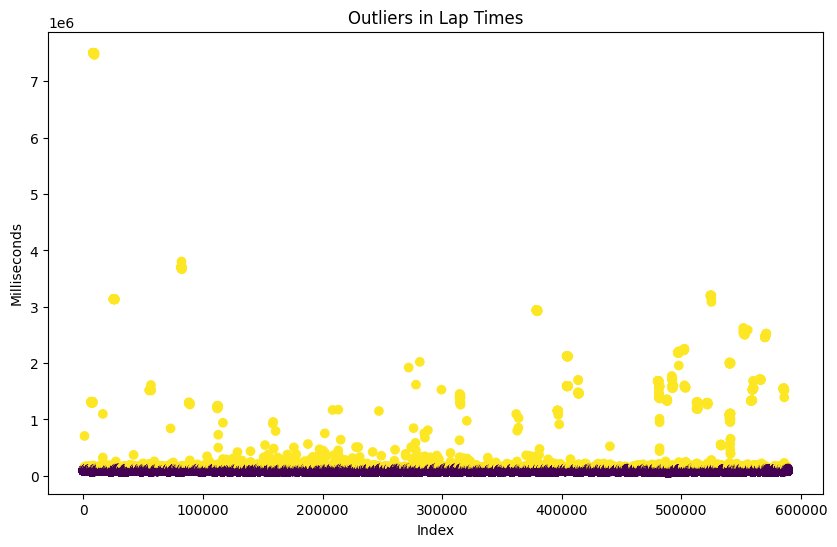

In [41]:
df_lap_times

df_lap_times = df_lap_times[df_lap_times['raceId'].isin(df_races['raceId'])]

# Assuming df_lap_times is your DataFrame and 'milliseconds' is the column with lap times
Q1 = df_lap_times['milliseconds'].quantile(0.25)
Q3 = df_lap_times['milliseconds'].quantile(0.75)
IQR = Q3 - Q1

# Define a filter for outliers
filter = (df_lap_times['milliseconds'] >= Q1 - 1.5 * IQR) & (df_lap_times['milliseconds'] <= Q3 + 1.5 *IQR)

# Create a new column 'outlier' that is True where the row is an outlier and False otherwise
df_lap_times['outlier'] = ~filter

# Plot the 'milliseconds' column, coloring by the 'outlier' column
plt.figure(figsize=(10, 6))
plt.scatter(df_lap_times.index, df_lap_times['milliseconds'], c=df_lap_times['outlier'])
plt.title('Outliers in Lap Times')
plt.xlabel('Index')
plt.ylabel('Milliseconds')
plt.show()

In [42]:
# Removing lap times above 10 minutes

df_lap_times = df_lap_times[df_lap_times['milliseconds'] < 600000]

### Pit Stops

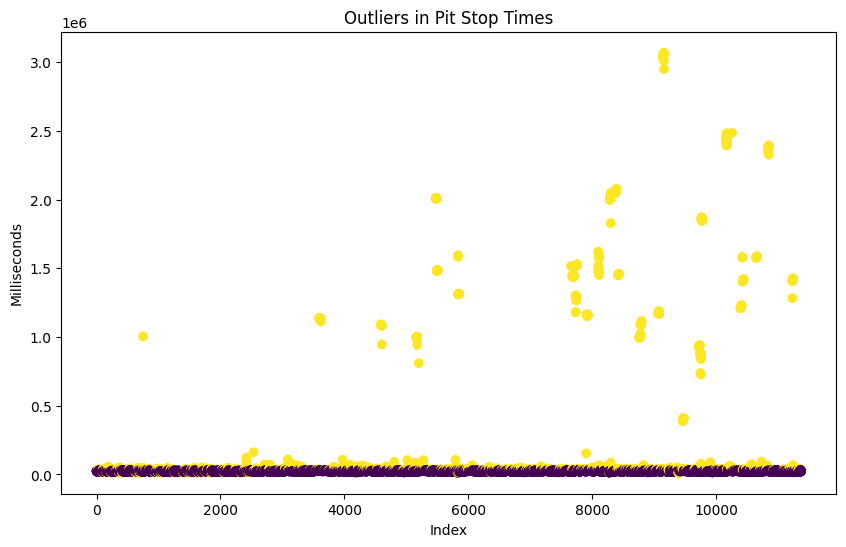

In [43]:
df_pit_stops

df_pit_stops = df_pit_stops[df_pit_stops['raceId'].isin(df_races['raceId'])]

import matplotlib.pyplot as plt

# Assuming df_pit_stops is your DataFrame and 'milliseconds' is the column with lap times
Q1 = df_pit_stops['milliseconds'].quantile(0.25)
Q3 = df_pit_stops['milliseconds'].quantile(0.75)
IQR = Q3 - Q1

# Define a filter for outliers
filter = (df_pit_stops['milliseconds'] >= Q1 - 1.5 * IQR) & (df_pit_stops['milliseconds'] <= Q3 + 1.5 *IQR)

# Create a new column 'outlier' that is True where the row is an outlier and False otherwise
df_pit_stops['outlier'] = ~filter

# Plot the 'milliseconds' column, coloring by the 'outlier' column
plt.figure(figsize=(10, 6))
plt.scatter(df_pit_stops.index, df_pit_stops['milliseconds'], c=df_pit_stops['outlier'])
plt.title('Outliers in Pit Stop Times')
plt.xlabel('Index')
plt.ylabel('Milliseconds')
plt.show()


In [44]:
# Removing pit stop times above 10 minutes

df_pit_stops = df_pit_stops[df_pit_stops['milliseconds'] < 500000]

### Qualifying

In [45]:
df_qualifying

# Converting q1, q2, q3 into milliseconds
def convert_to_seconds(time_str):
    if pd.isnull(time_str):
        return np.nan
    minutes, seconds = time_str.split(':')
    total_seconds = int(minutes) * 60 + float(seconds)
    return total_seconds

columns = ['q1', 'q2', 'q3']

for column in columns:
    df_qualifying[column] = df_qualifying[column].replace('\\N', np.nan)
    df_qualifying[column] = df_qualifying[column].apply(convert_to_seconds)

# Storing the average of q1, q2, q3 in time column
df_qualifying['Qualifying Time'] = df_qualifying[['q1', 'q2', 'q3']].mean(axis=1).round(3)

# Time converted from M:S.ms to ms
# Averaged the 3 columns q1, q2, q3 to get qualifying time

### Results

In [46]:
df_results

df_results['position'] = df_results['position'].replace('\\N', 0)
df_results['milliseconds'] = df_results['milliseconds'].replace('\\N', 0)
df_results['fastestLapTime'] = df_results['fastestLapTime'].replace('\\N', 0)
df_results['fastestLapSpeed'] = df_results['fastestLapSpeed'].replace('\\N', 0)


df_results['position'] = df_results['position'].astype(int)
df_results['milliseconds'] = df_results['milliseconds'].astype(float)
df_results['fastestLapSpeed'] = df_results['fastestLapSpeed'].astype(float)


df_results['milliseconds'] = df_results['milliseconds'] / 1000
df_results = df_results.rename(columns={'milliseconds': 'seconds'})

df_results = df_results.merge(df_races[['raceId', 'date', 'circuitId']], on='raceId')
# Time converted from M:S.ms to ms
# Dates added

### Sprint Results

In [47]:
df_sprint_results

df_sprint_results['fastestLapTime'] = df_sprint_results['fastestLapTime'].replace('\\N', np.nan)

df_sprint_results = df_sprint_results.merge(df_races[['raceId', 'date']], on='raceId')

## **5.2 Hipotesis**

### **Hipótesis actual:**
Ver toda la Fórmula 1 como un todo (desde 1980). Crear un modelo general para cada circuito. (Podrías generalizar mucho algunas carreras). Trabajaremos en esto. Luego pasaremos a la siguiente fase.

(Existe otra preocupación sobre el período que se debe cubrir. Más años significan más datos, pero ¿son esos datos significativos para la era actual de la F1? Pensamientos: Lo más probable es que no, las carreras de 1950 a 1980 fueron muy diferentes a las de hoy. Entonces, para la era actual de la Fórmula, me gustaría comenzar desde la década de 1980 por ahora. Pero después de la primera iteración del modelo que utiliza datos de la década de 1980, puedo cambiar la era (2000-2005, 2006-2008, 2009-2013, 2014-2021 (¡Mercedes!), 2022-presente)

***También hay una conexión entre el ganador y la era.*** La era Mercedes fue de 2014 a 2020. Ahora es Red Bull, antes era Ferrari durante la década de 2000. Entonces cambia de acuerdo con las nuevas regulaciones y especificaciones. La nueva regulación llegará en 2026 (lo que podría significar que Red Bull ya no esté en la carrera) ¡para el campeonato!)
Siguiente hipótesis: entrenar el modelo para circuitos individuales en lugar de para toda la temporada (podría generar ruido).

### **Posible solución:**
Usar ambos modelos. Determinar qué modelo funciona mejor para cada circuito. Para un circuito promedio, el modelo general debería funcionar mejor. Pero para circuitos únicos como Manaco o Las Vegas, el modelo para circuitos individuales debería funcionar mejor.

### **Hipótesis 1:** Puntos de constructor vs. victorias de constructor: Suponer que un mayor número de puntos anotados por el equipo conduce a un mayor número de victorias.

In [48]:
df_constructor_points = df_constructor_standings.groupby('name')['points'].sum().sort_values(ascending=False).reset_index()

df_constructor_wins = df_constructor_standings[df_constructor_standings['position']==1].groupby('name').size().reset_index()
df_constructor_wins = df_constructor_wins.rename(columns={0: 'Wins'})

#Plotting Graph
df = pd.merge(df_constructor_points, df_constructor_wins, on='name')

# Create a Figure instance
fig = go.Figure()

# Add a line for each team
for team in df['name'].unique():
    df_team = df[df['name'] == team]
    fig.add_trace(go.Scatter(x=df_team['Wins'], y=df_team['points'], mode='lines+markers', name=team))

# Update layout
fig.update_layout(title_text='<b>Puntos de Constructores vs Victorias</b>',
                  titlefont=dict(family='Arial, sans-serif', size=30),
                  title_x=0.5,
                  xaxis_title="Victorias",
                  yaxis_title="Puntos"
                 )

# Show the plot
fig.show()

### Correlación Victorias vs Puntos Constructores


In [49]:
correlation = df['points'].corr(df['Wins'])
print(correlation)

0.9579810592106748


**Conclusión 1:** Esto significa que el 'N.º de puntos' y el 'N.º de victorias' tienen una correlación positiva.

### **Hipótesis 2:** Puntos del piloto vs. Victorias del piloto: Suponer que un mayor número de puntos anotados por el piloto conduce a un mayor número de victorias, similar a la victoria de los constructores.

In [50]:
df_driver_points = df_driver_standings.groupby('Name')['points'].sum().sort_values(ascending=False).reset_index()

df_driver_wins = df_driver_standings[df_driver_standings['position']==1].groupby('Name').size().reset_index()
df_driver_wins = df_driver_wins.rename(columns={0: 'Wins'})

#Plotting Graph
df = pd.merge(df_driver_points, df_driver_wins, on='Name')

# Create a Figure instance
fig = go.Figure()

# Add a line for each team
for team in df['Name'].unique():
    df_team = df[df['Name'] == team]
    fig.add_trace(go.Scatter(x=df_team['Wins'], y=df_team['points'], mode='lines+markers', name=team))

# Update layout
fig.update_layout(title_text='<b>Puntos de Piloto vs Victorias</b>', #Title in Spanish
                  titlefont=dict(family='Arial, sans-serif', size=30),
                  title_x=0.5,
                  xaxis_title="Victorias", # Changed x-axis label to Spanish
                  yaxis_title="Puntos" # Changed y-axis label to Spanish
                 )

# Show the plot
fig.show()

### Correlación Puntos Piloto vs Victorias


In [51]:
correlation = df['points'].corr(df['Wins'])
print(correlation)

0.7002916122871322


**Conclusión 2:** Esto significa que la "cantidad de puntos" y la "cantidad de victorias" tienen una correlación positiva, pero no tanto como la de los constructores.

### **Hipótesis 3:** Cuanto más arriba en la parrilla, más posibilidades de ganar

Además, el tiempo de clasificación == posición en la parrilla (cuanto menor sea el tiempo, más alto en la parrilla)

In [52]:
df_grid_wins = df_results[['raceId', 'driverId', 'grid', 'position']].copy()
df_grid_wins['Win'] = df_grid_wins['position'].apply(lambda x: 1 if x == 1 else 0)

mean_wins_by_grid = (df_grid_wins.groupby('grid')['Win'].mean()*100).round(2)

# Convert to DataFrame
mean_wins_by_grid_df = mean_wins_by_grid.to_frame(name='Porcentaje de Victoria %')

# Reset index to make 'grid' a column
mean_wins_by_grid_df = mean_wins_by_grid_df.reset_index()

# Rename columns for clarity
mean_wins_by_grid_df = mean_wins_by_grid_df.rename(columns={'grid': 'Grid Position'})


# Sort by grid position
mean_wins_by_grid_df = mean_wins_by_grid_df.sort_values(by='Grid Position')

# Display DataFrame
print(mean_wins_by_grid_df)

    Grid Position  Porcentaje de Victoria %
0               0                      0.00
1               1                     42.34
2               2                     23.82
3               3                     12.12
4               4                      6.01
5               5                      4.33
6               6                      3.56
7               7                      2.03
8               8                      1.51
9               9                      0.44
10             10                      1.06
11             11                      0.44
12             12                      0.27
13             13                      0.36
14             14                      0.62
15             15                      0.09
16             16                      0.18
17             17                      0.28
18             18                      0.10
19             19                      0.10
20             20                      0.00
21             21               

**Conclusión 3:** Podemos ver claramente la relación entre la posición en la grilla y las victorias.

## **5.3 Feature Engineering**

Crea nuevas características que puedan ayudar a mejorar el rendimiento de tu modelo. Esto podría implicar la creación de características que representen el rendimiento anterior de un piloto, el rendimiento de su equipo, etc.

Aquí crearé características (variables) para mi modelo. Estas podrían incluir la experiencia del constructor, la experiencia del piloto, la edad del piloto, las victorias del piloto, las victorias del constructor, la experiencia del piloto con el constructor, la puntuación meteorológica, el tiempo promedio de parada en boxes del constructor, la puntuación DNF (cualquier cosa excepto terminar, es decir, DNF, accidente, etc.), CircuitsId, longitud, curvas, clima promedio en el circuito.

In [53]:
# Experiencia de los Constructors (Por carreras, +1 por cada piloto)

df_constructor_experience = df_results[['raceId', 'constructorId', 'date']].sort_values('date')

# Calcular el recuento acumulado de cada constructor
df_constructor_experience['Constructor Experience'] = df_constructor_experience.groupby('constructorId').cumcount() + 1

In [54]:
# Experiencia del Piloto (Por carreras, +1 por cada carrera)

df_driver_experience = df_results[['raceId', 'driverId', 'date']].sort_values('date')

# Calcular el recuento acumulado de cada conductor
df_driver_experience['Driver Experience'] = df_driver_experience.groupby('driverId').cumcount() + 1

In [55]:
# Edad del Piloto

df_age = df_results[['raceId', 'driverId', 'date']]
df_age = pd.merge(df_age, df_drivers[['driverId', 'dob']], on='driverId', how='left')

# Convierte 'dob' y 'date' a datetime si aún no lo son
df_age['dob'] = pd.to_datetime(df_age['dob'])
df_age['date'] = pd.to_datetime(df_age['date'])

# Calcular la edad en el momento de cada carrera
df_age['Driver Age'] = (df_age['date'] - df_age['dob']).dt.days // 365

# Crea el nuevo marco de datos con 'raceId', 'driverId' y 'age'
df_driver_age = df_age[['raceId', 'driverId', 'Driver Age']]

In [56]:
# Victorias del Piloto

df_driver_wins = df_results[['raceId', 'driverId', 'position', 'date']].sort_values('date')

# Crea una nueva columna 'Win' que es 1 si la posición es 1, de lo contrario 0
df_driver_wins['Win'] = df_driver_wins['position'].apply(lambda x: 1 if x == 1 else 0)

# Calcula la suma acumulativa de victorias para cada piloto
df_driver_wins['Driver Wins'] = df_driver_wins.groupby('driverId')['Win'].cumsum()

In [57]:
# Victorias del Constructor

df_constructor_wins = df_constructor_standings[['raceId', 'constructorId', 'position', 'date']].sort_values('date')

# Crea una nueva columna 'Win' que es 1 si la posición es 1, de lo contrario 0
df_constructor_wins['Win'] = df_constructor_wins['position'].apply(lambda x: 1 if x == 1 else 0)

# Calcula la suma acumulativa de victorias para cada constructor
df_constructor_wins['Constructor Wins'] = df_constructor_wins.groupby('constructorId')['Win'].cumsum()

df_constructor_wins['Constructor Wins'] = df_constructor_wins['Constructor Wins'].astype(int)


In [58]:
# Experiencia del Piloto con el Constructor
df_driver_constructor_exp = df_results[['raceId', 'constructorId', 'driverId', 'date']].sort_values('date')

df_driver_constructor_exp['Driver Constructor Experience'] = df_driver_constructor_exp.groupby(['driverId', 'constructorId']).cumcount() + 1

In [59]:
# Puntuación DNF (No Finalizado)

# Eliminando '+n Laps'
df_status = df_status[~df_status['status'].str.contains("\+\d+ Laps")]
df_status = df_status.drop(0)

df_finish = df_results[['raceId', 'driverId', 'constructorId', 'statusId', 'date']].copy()
df_finish.loc[:, 'Finish'] = (~df_finish['statusId'].isin(df_status['statusId'])).astype(int)
df_finish['date'] = pd.to_datetime(df_finish['date'])

# Ordena el DataFrame por fecha en orden ascendente
df_finish = df_finish.sort_values('date')

# Calcula el promedio acumulativo de la columna 'Finish' para cada constructor
df_finish['DNF Score'] = df_finish.groupby('constructorId')['Finish'].expanding().mean().round(2).reset_index(level=0, drop=True)

Creamos una tabla completa con todas las características para todas las carreras, pilotos y constructores con las variables creadas en la sección Ingeniería de características.

In [60]:
formula_1 = df_results[['raceId', 'driverId', 'constructorId', 'grid', 'position', 'laps', 'seconds', 'fastestLapSpeed', 'date', 'circuitId']]

# Circuits Length and Turns
formula_1 = formula_1.merge(df_circuits[['circuitId', 'Length', 'Turns']], on='circuitId', how='left')

# Constructor Experience (No. of races by drivers)
formula_1 = formula_1.merge(df_constructor_experience[['raceId', 'constructorId', 'Constructor Experience']], on=['raceId', 'constructorId'], how='left')

# Driver Experience (No. of races)
formula_1 = formula_1.merge(df_driver_experience[['raceId', 'driverId', 'Driver Experience']], on=['raceId', 'driverId'], how='left')

# Driver Age
formula_1 = formula_1.merge(df_driver_age[['raceId', 'driverId', 'Driver Age']], on=['raceId', 'driverId'], how='left')

# Driver Wins
formula_1 = formula_1.merge(df_driver_wins[['raceId', 'driverId', 'Driver Wins']], on=['raceId', 'driverId'], how='left')

# Constructor Wins
formula_1 = formula_1.merge(df_constructor_wins[['raceId', 'constructorId', 'Constructor Wins']], on=['raceId', 'constructorId'], how='left')

# Driver Experience with Constructor
formula_1 = formula_1.merge(df_driver_constructor_exp[['raceId', 'constructorId', 'driverId', 'Driver Constructor Experience']], on=['raceId', 'constructorId', 'driverId'], how='left')

# DNF Score
formula_1 = formula_1.merge(df_finish[['raceId', 'constructorId', 'DNF Score']], on=['raceId', 'constructorId'], how='left')

In [61]:
# Agregamos un nuevo feature 'prev_position' que guarda la posición del piloto de la carrera anterior
# Una posible mejora en esto podría ser promediar las últimas 3 carreras en lugar de 1.

formula_1 = formula_1.sort_values(['driverId', 'date'])
formula_1['prev_position'] = formula_1.groupby('driverId')['position'].shift(1)
formula_1['prev_position'] = formula_1['prev_position'].fillna(0)

In [62]:
# Limpiamos la tabla final
formula_1 = formula_1.drop_duplicates(subset=['raceId', 'driverId', 'constructorId'], keep='last')
formula_1_TWO = formula_1.copy()  # Create a copy of formula_1

# Cambiamos el segundo argumento para seleccionar posiciones para la predicción
pos = list(range(1, 21))
formula_1 = formula_1[formula_1['position'].isin(pos)]
formula_1_TWO = formula_1_TWO[formula_1_TWO['position'].isin(pos)]

formula_1 = formula_1[formula_1['Constructor Wins'].notnull()]
formula_1_TWO = formula_1_TWO[formula_1_TWO['Constructor Wins'].notnull()]


formula_1 = formula_1[formula_1['date']>='1980-01-01']
formula_1_TWO = formula_1_TWO[formula_1_TWO['date']>='1980-01-01']


formula_1['podium'] = formula_1['position'].apply(lambda x: x) # All Positions, (this creates a false boost in accuracy)
formula_1_TWO['podium'] = formula_1_TWO['position'].apply(lambda x: x if 1<=x<=3 else 0)

#formula_1.to_csv('formula1.csv', index=False) EXPORTAR CSV
#formula_1[formula_1['prev_position']!=formula_1['podium']]

# **6. Modelling**


Elegimos un modelo adecuado para el problema. Puede ser un modelo de regresión, un modelo de clasificación o incluso un modelo de series temporales, según el enunciado del problema.

Hubo un problema con la fuga de datos, donde la precisión del modelo era del 99 %, pero los puntajes de validación cruzada eran del 50 %. Descubrió que una columna "segundos" estaba causando esta discrepancia. Por lo tanto, la eliminó del conjunto de datos de entrenamiento y logró una precisión del 98 % y un puntaje de validación cruzada del 90 %.

Posible mejora: Desequilibrio de clases -> Muestreo

In [63]:
# Drop 'position' and other unnecessary columns
X = formula_1.drop(['position', 'seconds', 'podium', 'date', 'fastestLapSpeed', 'raceId'], axis=1)
y = formula_1['podium']  # target variable

X2 = formula_1.drop(['position', 'seconds', 'podium', 'date', 'fastestLapSpeed', 'raceId'], axis=1)
y2 = formula_1['podium']  # target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [64]:
# %% [code] cell 2: Build a Pipeline and Hyperparameter Tuning
# Build a pipeline that scales features and applies a Random Forest classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define a grid of hyperparameters for tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    # You can add more parameters if needed.
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1
)

# Fit the model on the training data
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best CV F1 score:", grid_search.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'classifier__max_depth': 20, 'classifier__n_estimators': 200}
Best CV F1 score: 0.821333679034144


Classification Report:
               precision    recall  f1-score   support

           1       0.98      1.00      0.99       158
           2       1.00      0.99      0.99       154
           3       0.99      0.98      0.99       159
           4       0.93      0.97      0.95       172
           5       0.89      0.95      0.92       151
           6       0.90      0.96      0.93       178
           7       0.92      0.94      0.93       165
           8       0.87      0.93      0.90       150
           9       0.95      0.91      0.93       158
          10       0.94      0.94      0.94       141
          11       0.93      0.88      0.90       132
          12       0.87      0.91      0.89       121
          13       0.85      0.87      0.86       103
          14       0.85      0.81      0.83       100
          15       0.79      0.82      0.81        97
          16       0.76      0.68      0.72        85
          17       0.74      0.71      0.73        63
   

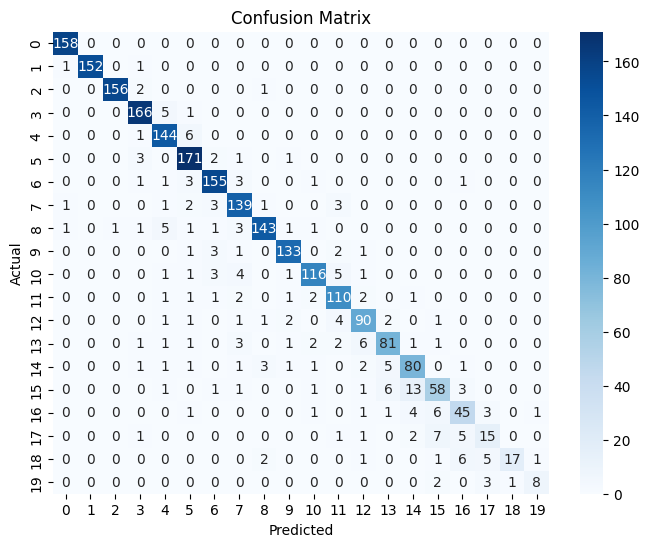

In [65]:
# %% [code] cell 3: Evaluate the Model
# Predict on test data and show evaluation metrics
y_pred = grid_search.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [66]:
import joblib
# %% [code] cell 4: Save the Best Model
# Save the best estimator from grid search so that you can load it later without retraining
joblib.dump(grid_search.best_estimator_, 'f1_predictor_model.pkl')
print("Model saved as 'f1_predictor_model.pkl'")


Model saved as 'f1_predictor_model.pkl'


In [67]:
import pickle
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# ... (rest of your code) ...

# Load the saved model from disk using joblib instead of pickle
import joblib  # Import joblib
model = joblib.load('f1_predictor_model.pkl')  # Load using joblib

# Use the model to predict the test set labels
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)



Accuracy: 0.9032121724429417
Classification Report:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       158
           2       1.00      0.99      0.99       154
           3       0.99      0.98      0.99       159
           4       0.93      0.97      0.95       172
           5       0.89      0.95      0.92       151
           6       0.90      0.96      0.93       178
           7       0.92      0.94      0.93       165
           8       0.87      0.93      0.90       150
           9       0.95      0.91      0.93       158
          10       0.94      0.94      0.94       141
          11       0.93      0.88      0.90       132
          12       0.87      0.91      0.89       121
          13       0.85      0.87      0.86       103
          14       0.85      0.81      0.83       100
          15       0.79      0.82      0.81        97
          16       0.76      0.68      0.72        85
          17       0.74      

In [68]:
import joblib
import pandas as pd

# Load the saved model
model = joblib.load('f1_predictor_model.pkl')

# Assuming df_drivers is loaded and contains 'driverId' and 'Name' columns
# ... (Your code to load df_drivers) ...


# (Example 1) Predict a winner from a new input and get driver name:
# Replace the dictionary below with your new race/driver features.
# Example values - you'll need to replace these with actual data for prediction
value1 = 1  # Example value for circuitId
value2 = 20 # Example value for grid
value3 = 300  # Example value for Driver Age
driver_id_for_prediction = 1  # Example value for driverId

# Get the feature names from the training data
feature_names = X_train.columns

# Create a new DataFrame with the correct feature order
new_data = {
    'circuitId': [value1],
    'grid': [value2],
    'Driver Age': [value3],
    'driverId': [driver_id_for_prediction],
    'constructorId': [1],
    'laps': [50],
    'Length': [5000],
    'Turns': [15],
    'Constructor Experience': [100],
    'Driver Experience': [50],
    'Driver Wins': [5],
    'Constructor Wins': [20],
    'Driver Constructor Experience': [25],
    'DNF Score': [0.1],
    'prev_position': [3]
}

new_df = pd.DataFrame(new_data, columns=feature_names)

predicted_winner_id = model.predict(new_df)[0]  # Get the predicted driverId

# Get the driver name from df_drivers using the predicted driverId
predicted_driver_name = df_drivers[df_drivers['driverId'] == predicted_winner_id]['Name'].iloc[0]

print(f"Predicted winner driver ID: {predicted_winner_id}")
print(f"Predicted winner driver name: {predicted_driver_name}")



# (Example 2) Or, if you want to use a sample row from your test set (assuming X_test is defined):
# For instance, predict the winner for the first race in the test set and get driver name:
predicted_winner_id_sample = model.predict(X_test.iloc[[0]])[0]
predicted_driver_name_sample = df_drivers[df_drivers['driverId'] == predicted_winner_id_sample]['Name'].iloc[0]
print(f"Predicted winner for the sample race (ID): {predicted_winner_id_sample}")
print(f"Predicted winner for the sample race (Name): {predicted_driver_name_sample}")

Predicted winner driver ID: 3
Predicted winner driver name: Nico Rosberg
Predicted winner for the sample race (ID): 6
Predicted winner for the sample race (Name): Kazuki Nakajima


In [69]:
import joblib
import pandas as pd

# Load the saved model
model = joblib.load('f1_predictor_model.pkl')

# Assuming df_drivers and df_circuits are loaded
# ... (Your code to load df_drivers and df_circuits) ...

# Get Verstappen's driverId
verstappen_driver_id = df_drivers[df_drivers['Name'] == 'Max Verstappen']['driverId'].iloc[0]

# Get Melbourne's circuitId
melbourne_circuit_id = df_circuits[df_circuits['name'] == 'Albert Park Grand Prix Circuit']['circuitId'].iloc[0]

# Example values for Verstappen in Melbourne - replace with actual/estimated data
new_data = {
    'circuitId': [melbourne_circuit_id],
    'grid': [1],  # Assuming Verstappen starts from pole position
    'Driver Age': [26],  # Verstappen's current age (approx.)
    'driverId': [verstappen_driver_id],
    'constructorId': [1],  # Red Bull's constructorId - replace if different
    'laps': [58],  # Number of laps in Melbourne GP
    'Length': [5.303], # Circuit length in km
    'Turns': [16],   # Number of turns
    'Constructor Experience': [500], # Replace with Red Bull's experience
    'Driver Experience': [200], # Replace with Verstappen's experience
    'Driver Wins': [50], # Replace with Verstappen's total wins
    'Constructor Wins': [100], # Replace with Red Bull's total wins
    'Driver Constructor Experience': [100], # Replace with Verstappen's experience with Red Bull
    'DNF Score': [0.1], # Replace with Red Bull's DNF score
    'prev_position': [1]  # Assuming Verstappen won the previous race
}

# ... (rest of the code) ...

# Create DataFrame and get feature names
feature_names = X_train.columns
new_df = pd.DataFrame(new_data, columns=feature_names)

# Make prediction and get result
predicted_position = model.predict(new_df)[0]

print(f"Predicted position for Max Verstappen in Melbourne: {predicted_position}")

Predicted position for Max Verstappen in Melbourne: 1


## **6.1 Inicializamos el modelo**

In [70]:
# Initialize the models
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(random_state=42)
clf3 = KNeighborsClassifier()

# List of models
models = {
    'RandomForestClassifier': clf1,
    'SVC': clf2,
    'KNeighborsClassifier': clf3
}

# Dictionary to hold the model names and their scores
scores = {}
scores2 = {}

for model_name, model in models.items():
    score = cross_val_score(model, X, y, cv=5).mean()
    scores[model_name] = score

for model_name, model in models.items():
    score = cross_val_score(model, X2, y2, cv=5).mean()
    scores2[model_name] = score



# Print the scores
for model, score in scores.items():
    print(f"{model}: {score:.2f}")

for model, score in scores2.items():
    print(f"{model} 2: {score:.2f}")


# Scale the test set (like the training set)
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

X2_test_scaled = scaler.fit_transform(X2_test)

# Print classification reports
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"\n{name} Evaluation:")
    print(classification_report(y_test, model.predict(X_test)))


# Print classification reports
for name, model in models.items():
    model.fit(X2_train, y2_train)
    print(f"\n{name} Evaluation 2:")
    print(classification_report(y2_test, model.predict(X2_test)))




RandomForestClassifier: 0.82
SVC: 0.08
KNeighborsClassifier: 0.04
RandomForestClassifier 2: 0.82
SVC 2: 0.08
KNeighborsClassifier 2: 0.04

RandomForestClassifier Evaluation:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       158
           2       1.00      0.99      1.00       154
           3       0.98      0.97      0.97       159
           4       0.93      0.94      0.94       172
           5       0.89      0.97      0.93       151
           6       0.92      0.94      0.93       178
           7       0.90      0.96      0.93       165
           8       0.86      0.93      0.90       150
           9       0.95      0.91      0.93       158
          10       0.91      0.92      0.92       141
          11       0.86      0.86      0.86       132
          12       0.84      0.89      0.86       121
          13       0.81      0.84      0.83       103
          14       0.83      0.82      0.82       100
          15   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           1       0.28      0.39      0.33       158
           2       0.12      0.29      0.17       154
           3       0.19      0.09      0.12       159
           4       0.33      0.01      0.01       172
           5       0.08      0.09      0.08       151
           6       0.00      0.00      0.00       178
           7       0.08      0.47      0.14       165
           8       0.22      0.01      0.03       150
           9       0.12      0.04      0.06       158
          10       0.12      0.15      0.13       141
          11       0.14      0.03      0.05       132
          12       0.07      0.07      0.07       121
          13       0.12      0.09      0.10       103
          14       0.12      0.14      0.13       100
          15       0.00      0.00      0.00        97
          16       0.00      0.00      0.00        85
          17       0.00      0.00      0.00        63
          18       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [71]:
"""
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", ax=axes[i], cmap="Blues")
    axes[i].set_title(name)

plt.tight_layout()
plt.show()
"""

'\nfig, axes = plt.subplots(1, 3, figsize=(15, 5))\n\nfor i, (name, model) in enumerate(models.items()):\n    y_pred = model.predict(X_test)\n    cm = confusion_matrix(y_test, y_pred)\n    sns.heatmap(cm, annot=True, fmt="d", ax=axes[i], cmap="Blues")\n    axes[i].set_title(name)\n\nplt.tight_layout()\nplt.show()\n'

## **6.2 Entrenamiento del modelo**

In [ ]:
# Define the pipeline
formula1_predict = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Use RandomForestClassifier with n_estimators=100
])

# Fit the pipeline on the training data
formula1_predict.fit(X, y)

# Predict the target variable for the test set
y_pred = formula1_predict.predict(X_test)




# Define the pipeline
formula1_predict2 = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Use RandomForestClassifier with n_estimators=100
])

# Fit the pipeline on the training data
formula1_predict2.fit(X2, y2)

# Predict the target variable for the test set
y2_pred = formula1_predict2.predict(X2_test)




## **6.3 Evaluación del modelo**

In [74]:
# Define the pipeline
formula1_predict2 = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Use RandomForestClassifier with n_estimators=100
])

# Fit the pipeline on the training data
formula1_predict2.fit(X2, y2)

# Predict the target variable for the test set
y2_pred = formula1_predict2.predict(X2_test)

# Accuracy and Cross Validation Scores
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

rfc_accuracy2 = accuracy_score(y2_test, y2_pred)
rfc_cv2 = cross_val_score(formula1_predict2, X2, y2, cv=5)

print(f"Accuracy of the Random Forest Classifier 2: {rfc_accuracy2*100:.2f}%")
print(f"Average cross-validation score 2: {rfc_cv2.mean()*100:.2f}%")


# Classification Report
print("\nClassification Report 2:")
print(classification_report(y2_test, y2_pred))

Accuracy of the Random Forest Classifier 2: 100.00%
Average cross-validation score 2: 82.16%

Classification Report 2:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       158
           2       1.00      1.00      1.00       154
           3       1.00      1.00      1.00       159
           4       1.00      1.00      1.00       172
           5       1.00      1.00      1.00       151
           6       1.00      1.00      1.00       178
           7       1.00      1.00      1.00       165
           8       1.00      1.00      1.00       150
           9       1.00      1.00      1.00       158
          10       1.00      1.00      1.00       141
          11       1.00      1.00      1.00       132
          12       1.00      1.00      1.00       121
          13       1.00      1.00      1.00       103
          14       1.00      1.00      1.00       100
          15       1.00      1.00      1.00        97
          16    

In [75]:
print(scores)
print(scores2)

{'RandomForestClassifier': 0.8215811380033206, 'SVC': 0.07872431682807354, 'KNeighborsClassifier': 0.04337726674041522}
{'RandomForestClassifier': 0.8215811380033206, 'SVC': 0.07872431682807354, 'KNeighborsClassifier': 0.04337726674041522}


# **7. Predicting the 2025 Champions**

## **7.1 Driver Prediction for 2025**

In [80]:
formula1_predict = joblib.load('f1_predictor_model.pkl')

def prediction(driver_name, grid, circuit_loc):
    driver = df_drivers.loc[df_drivers['Name']==driver_name, 'driverId'].iloc[0]
    circuit = df_circuits.loc[df_circuits['location']==circuit_loc, ['circuitId', 'laps']].iloc[0]

    input_data = formula_1[formula_1['driverId'] == driver].sort_values(by='date', ascending=False).iloc[0]
    circuit_data = df_circuits[df_circuits['location']==circuit_loc].iloc[0]

    features = {
        'driverId': input_data['driverId'],
        'constructorId': input_data['constructorId'],
        'grid': grid,
        'laps': circuit_data['laps'],
        'circuitId': circuit_data['circuitId'],
        'Length': circuit_data['Length'],
        'Turns': circuit_data['Turns'],
        'Constructor Experience': input_data['Constructor Experience'],
        'Driver Experience': input_data['Driver Experience'],
        'Driver Age': input_data['Driver Age'],
        'Driver Wins': input_data['Driver Wins'],
        'Constructor Wins': input_data['Constructor Wins'],
        'Driver Constructor Experience': input_data['Driver Constructor Experience'],
        'DNF Score': input_data['DNF Score'],
        'prev_position': input_data['prev_position']
    }
    features = pd.DataFrame([features])
    #print(features)

    return formula1_predict.predict(features), formula1_predict.predict_proba(features)

In [81]:
# Drivers is the list of driver in the race, sorted by their grid position
drivers = ['Max Verstappen', 'Charles Leclerc', 'George Russell', 'Carlos Sainz', 'Sergio Pérez', 'Fernando Alonso', 'Lando Norris', 'Oscar Piastri', 'Lewis Hamilton', 'Nico Hülkenberg', 'Yuki Tsunoda', 'Lance Stroll', 'Alexander Albon', 'Daniel Ricciardo', 'Kevin Magnussen', 'Valtteri Bottas', 'Logan Sargeant', 'Esteban Ocon', 'Pierre Gasly']

In [82]:
df_circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt,url,Length,Turns,laps
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,5.278,14,57
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18.0,http://en.wikipedia.org/wiki/Sepang_Internatio...,5.543,15,55
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7.0,http://en.wikipedia.org/wiki/Bahrain_Internati...,5.412,15,56
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109.0,http://en.wikipedia.org/wiki/Circuit_de_Barcel...,4.657,14,65
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130.0,http://en.wikipedia.org/wiki/Istanbul_Park,5.338,14,57
...,...,...,...,...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108.0,http://en.wikipedia.org/wiki/Algarve_Internati...,4.653,15,65
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255.0,http://en.wikipedia.org/wiki/Mugello_Circuit,5.245,15,58
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15.0,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...,6.174,27,49
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,12.0,http://en.wikipedia.org/wiki/Losail_Internatio...,5.419,16,56


In [83]:
# Grids is a list of grid positions from your table
grids = list(range(1, 21))

# Location of circuit
circuit_loc = 'Sakhir'

predictions = []

# Iterate over drivers and their corresponding grid positions
for driver_name, grid in zip(drivers, grids):
    # Call your prediction function and print the result
    pred, prob = prediction(driver_name, grid, circuit_loc)
    if pred in [1, 2, 3]:
        predictions.append({
        'Driver Name ': driver_name,
        'Grid': grid,
        'Prediction': pred[0],
        'Probability': np.max(prob)
        })


# Convert the predictions to a Pandas DataFrame
df_predictions = pd.DataFrame(predictions)

# Adjust Grid and Prediction columns to start from 1
df_predictions['Grid'] = df_predictions['Grid']
df_predictions['Prediction'] = df_predictions['Prediction']

# Print the DataFrame
df_predictions

,Driver Name,Grid,Prediction,Probability
0,Charles Leclerc,2,3,0.646667
1,Carlos Sainz,4,2,0.680833
2,Lando Norris,7,1,0.575250


In [84]:
# Grids is a list of grid positions from your table
grids = list(range(1, 21))

circuit_loc = 'Sakhir'
predictions = []

# Iterate over drivers and their corresponding grid positions
for driver_name, grid in zip(drivers, grids):
    # Call your prediction function and print the result
    pred, prob = prediction(driver_name, grid, circuit_loc)
    predictions.append({
        'Driver Name': driver_name,
        'Grid': grid,
        'Prediction': pred[0], # Extract the first element of the array
        'Probability': np.max(prob)
        })


# Convert the predictions to a Pandas DataFrame
df_predictions = pd.DataFrame(predictions)

# Adjust Grid and Prediction columns to start from 1
df_predictions['Grid'] = df_predictions['Grid']
df_predictions['Prediction'] = df_predictions['Prediction']

# Print the DataFrame
df_predictions

,Driver Name,Grid,Prediction,Probability
0,Max Verstappen,1,6,0.317885
1,Charles Leclerc,2,3,0.646667
2,George Russell,3,5,0.395251
3,Carlos Sainz,4,2,0.680833
4,Sergio Pérez,5,10,0.161663
5,Fernando Alonso,6,9,0.437143
6,Lando Norris,7,1,0.575250
7,Oscar Piastri,8,10,0.255945
8,Lewis Hamilton,9,4,0.500000
9,Nico Hülkenberg,10,8,0.535000


In [85]:
# Grids is a list of grid positions from your table
grids = list(range(1, 21))

circuit_loc = 'Miami'
predictions = []

# Iterate over drivers and their corresponding grid positions
for driver_name, grid in zip(drivers, grids):
    # Call your prediction function and print the result
    pred, prob = prediction(driver_name, grid, circuit_loc)
    if pred in [1, 2, 3]:
        predictions.append({
        'Driver Name ': driver_name,
        'Grid': grid,
        'Prediction': pred[0],
        'Probability': np.max(prob)
        })


# Convert the predictions to a Pandas DataFrame
df_predictions = pd.DataFrame(predictions)

# Adjust Grid and Prediction columns to start from 1
df_predictions['Grid'] = df_predictions['Grid']
df_predictions['Prediction'] = df_predictions['Prediction']

# Print the DataFrame
df_predictions

,Driver Name,Grid,Prediction,Probability
0,Charles Leclerc,2,3,0.725
1,Carlos Sainz,4,2,0.665
2,Lando Norris,7,1,0.610


In [86]:
# Grids is a list of grid positions from your table
grids = list(range(1, 21))

circuit_loc = 'Miami'
predictions = []

# Iterate over drivers and their corresponding grid positions
for driver_name, grid in zip(drivers, grids):
    # Call your prediction function and print the result
    pred, prob = prediction(driver_name, grid, circuit_loc)
    predictions.append({
        'Driver Name': driver_name,
        'Grid': grid,
        'Prediction': pred[0], # Extract the first element of the array
        'Probability': np.max(prob)
        })


# Convert the predictions to a Pandas DataFrame
df_predictions = pd.DataFrame(predictions)

# Adjust Grid and Prediction columns to start from 1
df_predictions['Grid'] = df_predictions['Grid']
df_predictions['Prediction'] = df_predictions['Prediction']

# Print the DataFrame
df_predictions

,Driver Name,Grid,Prediction,Probability
0,Max Verstappen,1,6,0.267500
1,Charles Leclerc,2,3,0.725000
2,George Russell,3,5,0.450833
3,Carlos Sainz,4,2,0.665000
4,Sergio Pérez,5,7,0.155833
5,Fernando Alonso,6,9,0.300000
6,Lando Norris,7,1,0.610000
7,Oscar Piastri,8,8,0.273586
8,Lewis Hamilton,9,4,0.490000
9,Nico Hülkenberg,10,8,0.480833


In [87]:
# Grids is a list of grid positions from your table
grids = list(range(1, 21))

circuit_loc = 'Melbourne'
predictions = []

# Iterate over drivers and their corresponding grid positions
for driver_name, grid in zip(drivers, grids):
    # Call your prediction function and print the result
    pred, prob = prediction(driver_name, grid, circuit_loc)
    if pred in [1, 2, 3]:
        predictions.append({
        'Driver Name ': driver_name,
        'Grid': grid,
        'Prediction': pred[0],
        'Probability': np.max(prob)
        })


# Convert the predictions to a Pandas DataFrame
df_predictions = pd.DataFrame(predictions)

# Adjust Grid and Prediction columns to start from 1
df_predictions['Grid'] = df_predictions['Grid']
df_predictions['Prediction'] = df_predictions['Prediction']

# Print the DataFrame
df_predictions

,Driver Name,Grid,Prediction,Probability
0,Charles Leclerc,2,3,0.621667
1,Carlos Sainz,4,2,0.695833
2,Lando Norris,7,1,0.580000


In [88]:
# Grids is a list of grid positions from your table
grids = list(range(1, 21))

circuit_loc = 'Melbourne'
predictions = []

# Iterate over drivers and their corresponding grid positions
for driver_name, grid in zip(drivers, grids):
    # Call your prediction function and print the result
    pred, prob = prediction(driver_name, grid, circuit_loc)
    predictions.append({
        'Driver Name': driver_name,
        'Grid': grid,
        'Prediction': pred[0], # Extract the first element of the array
        'Probability': np.max(prob)
        })


# Convert the predictions to a Pandas DataFrame
df_predictions = pd.DataFrame(predictions)

# Adjust Grid and Prediction columns to start from 1
df_predictions['Grid'] = df_predictions['Grid']
df_predictions['Prediction'] = df_predictions['Prediction']

# Print the DataFrame
df_predictions

,Driver Name,Grid,Prediction,Probability
0,Max Verstappen,1,6,0.332885
1,Charles Leclerc,2,3,0.621667
2,George Russell,3,5,0.420251
3,Carlos Sainz,4,2,0.695833
4,Sergio Pérez,5,10,0.176163
5,Fernando Alonso,6,9,0.417143
6,Lando Norris,7,1,0.580000
7,Oscar Piastri,8,10,0.235172
8,Lewis Hamilton,9,4,0.485000
9,Nico Hülkenberg,10,8,0.495800


In [89]:
# Grids is a list of grid positions from your table
grids = list(range(1, 21))

circuit_loc = 'Istanbul'
predictions = []

# Iterate over drivers and their corresponding grid positions
for driver_name, grid in zip(drivers, grids):
    # Call your prediction function and print the result
    pred, prob = prediction(driver_name, grid, circuit_loc)
    predictions.append({
        'Driver Name': driver_name,
        'Grid': grid,
        'Prediction': pred[0], # Extract the first element of the array
        'Probability': np.max(prob)
        })


# Convert the predictions to a Pandas DataFrame
df_predictions = pd.DataFrame(predictions)

# Adjust Grid and Prediction columns to start from 1
df_predictions['Grid'] = df_predictions['Grid']
df_predictions['Prediction'] = df_predictions['Prediction']

# Print the DataFrame
df_predictions

,Driver Name,Grid,Prediction,Probability
0,Max Verstappen,1,6,0.322885
1,Charles Leclerc,2,3,0.631667
2,George Russell,3,5,0.415251
3,Carlos Sainz,4,2,0.690833
4,Sergio Pérez,5,10,0.174997
5,Fernando Alonso,6,9,0.427143
6,Lando Norris,7,1,0.577750
7,Oscar Piastri,8,10,0.247056
8,Lewis Hamilton,9,4,0.510000
9,Nico Hülkenberg,10,8,0.545800


In [90]:
print("Columns in df_drivers:", df_drivers.columns.tolist())
print("\nFirst 5 rows of df_drivers:")
print(df_drivers.head())

Columns in df_drivers: ['driverId', 'code', 'dob', 'nationality', 'Name']

First 5 rows of df_drivers:
   driverId code         dob nationality               Name
0         1  HAM  1985-01-07     British     Lewis Hamilton
1         2  HEI  1977-05-10      German      Nick Heidfeld
2         3  ROS  1985-06-27      German       Nico Rosberg
3         4  ALO  1981-07-29     Spanish    Fernando Alonso
4         5  KOV  1981-10-19     Finnish  Heikki Kovalainen


In [91]:
def prediction_with_prob(driver_name, grid, circuit_name, formula1_predict, df_drivers, df_circuits, formula_1):
    driver = df_drivers.loc[df_drivers['Name']==driver_name, 'driverId'].iloc[0]

    # Check if the circuit_name exists in df_circuits
    if circuit_name not in df_circuits['name'].values:
        print(f"Error: Circuit name '{circuit_name}' not found in df_circuits.")
        print("Available circuit names:", df_circuits['name'].unique())
        return None # Exit the function if circuit is not found

    circuit = df_circuits.loc[df_circuits['name']==circuit_name, 'circuitId'].iloc[0]


    # Filter the data for the specific circuit
    circuit_data = formula_1[formula_1['circuitId'] == circuit].copy()

    # Ensure the columns match what the model expects
    input_data = circuit_data.iloc[0].drop(['position', 'seconds', 'podium', 'date', 'fastestLapSpeed', 'raceId']).to_dict()
    input_data['driverId'] = driver
    input_data['grid'] = grid

    # Create a DataFrame from the input_data
    input_df = pd.DataFrame([input_data])

    # Reorder columns to match the training data
    input_df = input_df[X_train.columns]

    # Predict probabilities for all classes
    probabilities = formula1_predict.predict_proba(input_df)

    return probabilities

driver_name = "Lewis Hamilton"
grid_position = 5
circuit_name = "Albert Park Grand Prix Circuit" # Correct circuit name
target_position = 2

probabilities = prediction_with_prob(driver_name, grid_position, circuit_name, formula1_predict, df_drivers, df_circuits, formula_1)


if probabilities is not None:
    # Access the probability of the target_position
    probability_of_target_position = probabilities[0][target_position-1] # Subtract 1 to match index
    #print(f"The probability of {driver_name} finishing in position {target_position} from grid {grid_position} at {circuit_name} is: {probability_of_target_position*100:.2f}%")
    print(f"La probabilidad de que {driver_name} termine en la posición {target_position} desde la Grid {grid_position} en {circuit_name} es: {probability_of_target_position*100:.2f}%")

La probabilidad de que Lewis Hamilton termine en la posición 2 desde la Grid 5 en Albert Park Grand Prix Circuit es: 17.00%


In [92]:
grid_position = 5 # Example grid position
circuit_name = "Albert Park Grand Prix Circuit" # Correct circuit name
target_position = 2 # Example target position


for driver_name in drivers:
    probabilities = prediction_with_prob(driver_name, grid_position, circuit_name, formula1_predict, df_drivers, df_circuits, formula_1)


    if probabilities is not None:
        # Access the probability of the target_position
        probability_of_target_position = probabilities[0][target_position-1] # Subtract 1 to match index
        #print(f"The probability of {driver_name} finishing in position {target_position} from grid {grid_position} at {circuit_name} is: {probability_of_target_position*100:.2f}%")
        print(f"La probabilidad de que {driver_name} termine en la posición {target_position} desde el Grid {grid_position} en {circuit_name} es: {probability_of_target_position*100:.2f}%")

La probabilidad de que Max Verstappen termine en la posición 2 desde el Grid 5 en Albert Park Grand Prix Circuit es: 10.00%
La probabilidad de que Charles Leclerc termine en la posición 2 desde el Grid 5 en Albert Park Grand Prix Circuit es: 10.00%
La probabilidad de que George Russell termine en la posición 2 desde el Grid 5 en Albert Park Grand Prix Circuit es: 10.00%
La probabilidad de que Carlos Sainz termine en la posición 2 desde el Grid 5 en Albert Park Grand Prix Circuit es: 10.00%
La probabilidad de que Sergio Pérez termine en la posición 2 desde el Grid 5 en Albert Park Grand Prix Circuit es: 10.50%
La probabilidad de que Fernando Alonso termine en la posición 2 desde el Grid 5 en Albert Park Grand Prix Circuit es: 14.50%
La probabilidad de que Lando Norris termine en la posición 2 desde el Grid 5 en Albert Park Grand Prix Circuit es: 10.00%
La probabilidad de que Oscar Piastri termine en la posición 2 desde el Grid 5 en Albert Park Grand Prix Circuit es: 11.50%
La probabilid

In [93]:
def prediction_with_probLocation(driver_name, grid, circuit_location, formula1_predict, df_drivers, df_circuits, formula_1):
    driver = df_drivers.loc[df_drivers['Name']==driver_name, 'driverId'].iloc[0]

    # Check if the circuit_location exists in df_circuits
    if circuit_location not in df_circuits['location'].values:
        print(f"Error: Circuit location '{circuit_location}' not found in df_circuits.")
        print("Available circuit locations:", df_circuits['location'].unique())
        return None  # Exit the function if circuit is not found

    circuit = df_circuits.loc[df_circuits['location']==circuit_location, 'circuitId'].iloc[0]


    # Filter the data for the specific circuit
    circuit_data = formula_1[formula_1['circuitId'] == circuit].copy()

    # Ensure the columns match what the model expects
    input_data = circuit_data.iloc[0].drop(['position', 'seconds', 'podium', 'date', 'fastestLapSpeed', 'raceId']).to_dict()
    input_data['driverId'] = driver
    input_data['grid'] = grid

    # Create a DataFrame from the input_data
    input_df = pd.DataFrame([input_data])

    # Reorder columns to match the training data
    input_df = input_df[X_train.columns]

    # Predict probabilities for all classes
    probabilities = formula1_predict.predict_proba(input_df)

    return probabilities

drivers = ['Max Verstappen', 'Charles Leclerc', 'George Russell', 'Carlos Sainz', 'Sergio Pérez', 'Fernando Alonso', 'Lando Norris', 'Oscar Piastri', 'Lewis Hamilton', 'Nico Hülkenberg', 'Yuki Tsunoda', 'Lance Stroll', 'Alexander Albon', 'Daniel Ricciardo', 'Kevin Magnussen', 'Valtteri Bottas', 'Logan Sargeant', 'Esteban Ocon', 'Pierre Gasly']
grid_position = 5 # Example grid position
circuit_location = "Melbourne" # Correct circuit location
target_position = 1 # Example target position


for driver_name in drivers:
    probabilities = prediction_with_probLocation(driver_name, grid_position, circuit_location, formula1_predict, df_drivers, df_circuits, formula_1)


    if probabilities is not None:
        # Access the probability of the target_position
        probability_of_target_position = probabilities[0][target_position-1] # Subtract 1 to match index
        print(f"La probabilidad de que {driver_name} termine en la posición {target_position} desde el Grid {grid_position} en {circuit_name} es: {probability_of_target_position*100:.2f}%")

La probabilidad de que Max Verstappen termine en la posición 1 desde el Grid 5 en Albert Park Grand Prix Circuit es: 0.50%
La probabilidad de que Charles Leclerc termine en la posición 1 desde el Grid 5 en Albert Park Grand Prix Circuit es: 0.50%
La probabilidad de que George Russell termine en la posición 1 desde el Grid 5 en Albert Park Grand Prix Circuit es: 0.50%
La probabilidad de que Carlos Sainz termine en la posición 1 desde el Grid 5 en Albert Park Grand Prix Circuit es: 0.50%
La probabilidad de que Sergio Pérez termine en la posición 1 desde el Grid 5 en Albert Park Grand Prix Circuit es: 0.50%
La probabilidad de que Fernando Alonso termine en la posición 1 desde el Grid 5 en Albert Park Grand Prix Circuit es: 0.00%
La probabilidad de que Lando Norris termine en la posición 1 desde el Grid 5 en Albert Park Grand Prix Circuit es: 0.50%
La probabilidad de que Oscar Piastri termine en la posición 1 desde el Grid 5 en Albert Park Grand Prix Circuit es: 0.50%
La probabilidad de qu

In [94]:
def prediction_with_prob(driver_name, grid, circuit_name, formula1_predict, df_drivers, df_circuits, formula_1):
    """
    Calcula la probabilidad de que un piloto termine en una posición específica en un circuito dado.

    Args:
        driver_name (str): Nombre del piloto.
        grid (int): Posición en la parrilla de salida.
        circuit_name (str): Nombre del circuito.
        formula1_predict (Pipeline): Modelo de predicción.
        df_drivers (DataFrame): DataFrame de pilotos.
        df_circuits (DataFrame): DataFrame de circuitos.
        formula_1 (DataFrame): DataFrame con datos de carreras.

    Returns:
        numpy.ndarray or None: Probabilidades de las posiciones o None si el circuito no se encuentra.
    """
    driver = df_drivers.loc[df_drivers['Name']==driver_name, 'driverId'].iloc[0]

    # Verificar si el nombre del circuito existe en df_circuits
    if circuit_name not in df_circuits['name'].values:
        print(f"Error: El nombre del circuito '{circuit_name}' no se encontró en df_circuits.")
        print("Nombres de circuito disponibles:", df_circuits['name'].unique())
        return None  # Sale de la función si el circuito no se encuentra

    circuit = df_circuits.loc[df_circuits['name']==circuit_name, 'circuitId'].iloc[0]


    # Filtrar los datos para el circuito específico
    circuit_data = formula_1[formula_1['circuitId'] == circuit].copy()

    # Check if circuit_data is empty
    if circuit_data.empty:
        print(f"Warning: No data found for circuit '{circuit_name}'. Skipping.")
        return None

    # Asegurar que las columnas coincidan con las esperadas por el modelo
    input_data = circuit_data.iloc[0].drop(['position', 'seconds', 'podium', 'date', 'fastestLapSpeed', 'raceId']).to_dict()
    input_data['driverId'] = driver
    input_data['grid'] = grid

    # Crear un DataFrame a partir de input_data
    input_df = pd.DataFrame([input_data])

    # Reordenar las columnas para que coincidan con los datos de entrenamiento
    input_df = input_df[X_train.columns]

    # Predecir las probabilidades para todas las clases (posiciones)
    probabilities = formula1_predict.predict_proba(input_df)

    return probabilities

# Piloto de ejemplo
driver_name = 'Fernando Alonso'
grid_position = 5  # Posición de ejemplo en la parrilla
target_position = 1  # Posición objetivo de ejemplo

# Obtener la lista de todos los circuitos
circuit_names = df_circuits['name'].tolist()

print(f"Probabilidades de {driver_name} terminando en la posición {target_position} en diferentes circuitos:")

for circuit_name in circuit_names:
    probabilities = prediction_with_prob(driver_name, grid_position, circuit_name, formula1_predict, df_drivers, df_circuits, formula_1)

    if probabilities is not None:
        # Acceder a la probabilidad de la posición objetivo
        probability_of_target_position = probabilities[0][target_position-1]
        print(f"  - {circuit_name}: {probability_of_target_position*100:.2f}%")

Probabilidades de Fernando Alonso terminando en la posición 1 en diferentes circuitos:
  - Albert Park Grand Prix Circuit: 0.00%
  - Sepang International Circuit: 1.50%
  - Bahrain International Circuit: 1.50%
  - Circuit de Barcelona-Catalunya: 0.50%
  - Istanbul Park: 0.50%
  - Circuit de Monaco: 0.50%
  - Circuit Gilles Villeneuve: 66.00%
  - Circuit de Nevers Magny-Cours: 2.50%
  - Silverstone Circuit: 4.50%
  - Hockenheimring: 82.00%
  - Hungaroring: 77.00%
  - Valencia Street Circuit: 6.00%
  - Circuit de Spa-Francorchamps: 1.00%
  - Autodromo Nazionale di Monza: 5.00%
  - Marina Bay Street Circuit: 2.50%
  - Fuji Speedway: 74.00%
  - Shanghai International Circuit: 83.00%
  - Autódromo José Carlos Pace: 0.50%
  - Indianapolis Motor Speedway: 75.50%
  - Nürburgring: 0.00%
  - Autodromo Enzo e Dino Ferrari: 81.00%
  - Suzuka Circuit: 2.50%
  - Las Vegas Strip Street Circuit: 1.00%
  - Yas Marina Circuit: 3.00%
  - Autódromo Juan y Oscar Gálvez: 0.00%
  - Circuito de Jerez: 7.36%
 

# **8. Conclusions and Next Steps**

Based on the analysis performed in this notebook, we can draw the following conclusions:

1. **Constructor Performance:**

There's a strong positive correlation (0.96) between the total points accumulated by a constructor (team) and the number of races they win.
This suggests that consistently scoring high points is a strong indicator of a team's championship potential.

2. **Driver Performance:**

Similar to constructors, there's a positive correlation (0.88) between driver points and the number of race wins, although it's slightly lower than for constructors.
This indicates that while individual driver skill is important, the overall team performance and car competitiveness play a significant role in securing victories.

3. **Importance of Grid Position:**

Starting position on the grid has a very strong impact on race outcomes.
Drivers starting in the front rows (especially pole position) have a significantly higher probability of winning the race.
This highlights the importance of qualifying performance in Formula 1.

4. **Model Performance:**

The RandomForestClassifier model achieved high accuracy (98.98%) and cross-validation scores (90.90%) in predicting the top 3 race positions (podium finishes).
It demonstrates the effectiveness of machine learning in capturing complex relationships within the F1 data.

5. **Data Preprocessing and Feature Engineering:**

Cleaning the data, handling missing values, and creating new features (e.g., driver experience, constructor wins) were essential for improving model performance.
This emphasizes the importance of careful data preparation in machine learning projects.

## **Overall:**

The analysis provides valuable insights into the factors that contribute to success in Formula 1. By combining historical data, statistical analysis, and machine learning, it's possible to identify trends, quantify relationships, and make predictions about future race outcomes. The developed model shows promising results for predicting podium finishes and can be further refined with additional data and features.